<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Machine-Learning_Project/blob/main/ML_updated_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

#Reading data from .csv file using pandas

In [ ]:
ride_data = pd.read_csv("/content/cab_rides.csv")
ride_data.tail()

distance cab_type     time_stamp destination         source  price  \
16400      3.44     Uber  1544757003863    Back Bay  South Station   11.0   
16401      3.44     Uber  1543314444138    Back Bay  South Station   10.5   
16402      3.44     Uber  1543587782205    Back Bay  South Station   35.0   
16403      3.44     Uber  1544693705310    Back Bay  South Station   10.5   
16404      3.44     Uber  1544796610665    Back Bay  South Station   17.0   

       surge_multiplier                                    id  \
16400               1.0  937f8345-9781-4185-9676-3724c0dc06bd   
16401               1.0  a6aa4da2-3eeb-4ad1-884a-59ac3a0d218e   
16402               1.0  bc9ca0c3-0f58-42cc-9db4-bbd4cd98a817   
16403               1.0  c8976f5a-2fae-47b0-aca6-2c6d1e29a9d5   
16404               1.0  e37c4bd3-1e74-401a-8be0-b08ef9c81a47   

                                 product_id       name  
16400  997acbb5-e102-41e1-b155-9df7de0a73f2   UberPool  
16401  9a0e7b09-b92b-4c41-9779-2ad22b4d779d        WAV  
16402  6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV  
16403  55c66225-fbe7-4fd5-9072-eab1ece5e23e      UberX  
16404  6f72dfc5-27f1-42e8-84db-ccc7a75f6969     UberXL

In [ ]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16405 entries, 0 to 16404
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          16405 non-null  float64
 1   cab_type          16405 non-null  object 
 2   time_stamp        16405 non-null  int64  
 3   destination       16405 non-null  object 
 4   source            16405 non-null  object 
 5   price             15111 non-null  float64
 6   surge_multiplier  16405 non-null  float64
 7   id                16405 non-null  object 
 8   product_id        16405 non-null  object 
 9   name              16405 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [ ]:
ride_data.describe()

distance    time_stamp         price  surge_multiplier
count  16405.000000  1.640500e+04  15111.000000      16405.000000
mean       2.151143  1.544031e+12     16.406194          1.014736
std        1.120357  6.876294e+08      9.201755          0.093571
min        0.020000  1.543204e+12      2.500000          1.000000
25%        1.260000  1.543439e+12      9.000000          1.000000
50%        2.080000  1.543721e+12     13.500000          1.000000
75%        2.860000  1.544813e+12     22.500000          1.000000
max        7.460000  1.545161e+12     80.000000          2.500000

In [ ]:
weather_data = pd.read_csv("/content/weather.csv")
weather_data.tail()

temp                 location  clouds  pressure  rain  time_stamp  \
6271  44.72            North Station    0.89   1000.69   NaN  1543819974   
6272  44.85  Northeastern University    0.88   1000.71   NaN  1543819974   
6273  44.82            South Station    0.89   1000.70   NaN  1543819974   
6274  44.78         Theatre District    0.89   1000.70   NaN  1543819974   
6275  44.69                 West End    0.89   1000.70   NaN  1543819974   

      humidity  wind  
6271      0.96  1.52  
6272      0.96  1.54  
6273      0.96  1.54  
6274      0.96  1.54  
6275      0.96  1.52

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


<ipython-input-9-d30f7589f3d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ride_data.corr()


<Axes: >

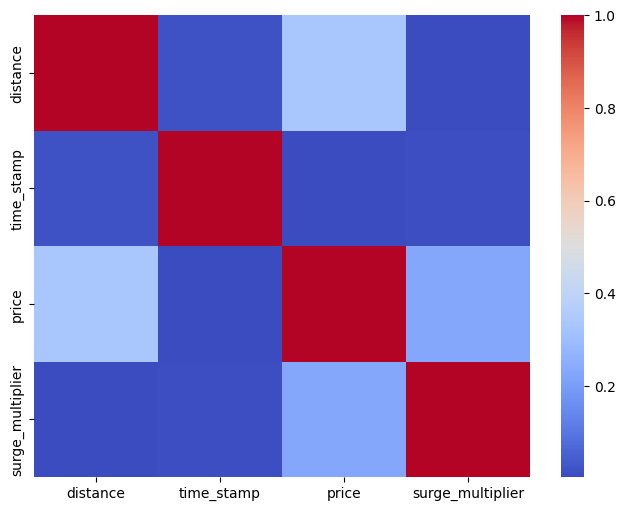

In [ ]:
corr_matrix = ride_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')

<ipython-input-10-9cdaf28390ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = weather_data.corr()


<Axes: >

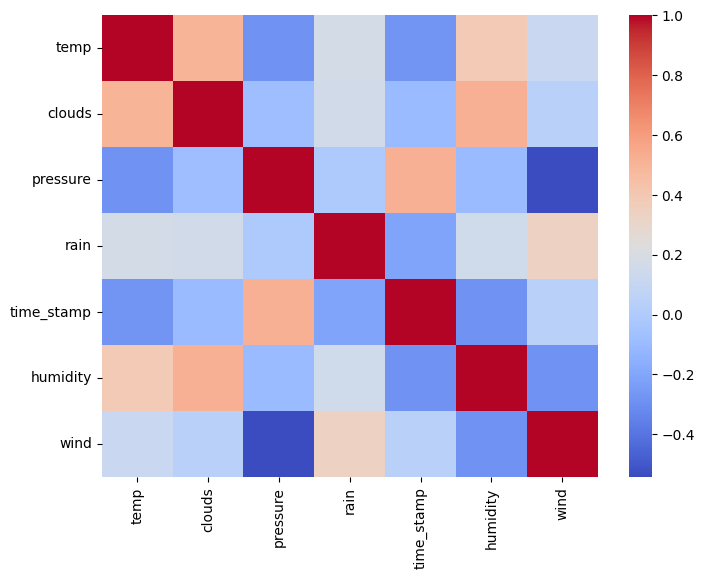

In [ ]:
corr_matrix = weather_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')

#Data preprocessing and visualization

In [ ]:
ride_data['time_stamp'] = pd.to_datetime(ride_data['time_stamp']/1000, unit='s')
ride_data['time_stamp']

0       2018-12-16 09:30:07.890000128
1       2018-11-27 02:00:23.676999936
2       2018-11-28 01:00:22.197999872
3       2018-11-30 04:53:02.749000192
4       2018-11-29 03:49:20.223000064
                     ...             
16400   2018-12-14 03:10:03.862999808
16401   2018-11-27 10:27:24.138000128
16402   2018-11-30 14:23:02.204999936
16403   2018-12-13 09:35:05.309999872
16404   2018-12-14 14:10:10.664999936
Name: time_stamp, Length: 16405, dtype: datetime64[ns]

In [ ]:
ride_data['date'] = ride_data['time_stamp'].dt.date
ride_data['time'] = ride_data['time_stamp'].dt.hour
ride_data['week_day'] = ride_data['time_stamp'].dt.weekday
ride_data.tail()

distance cab_type                    time_stamp destination  \
16400      3.44     Uber 2018-12-14 03:10:03.862999808    Back Bay   
16401      3.44     Uber 2018-11-27 10:27:24.138000128    Back Bay   
16402      3.44     Uber 2018-11-30 14:23:02.204999936    Back Bay   
16403      3.44     Uber 2018-12-13 09:35:05.309999872    Back Bay   
16404      3.44     Uber 2018-12-14 14:10:10.664999936    Back Bay   

              source  price  surge_multiplier  \
16400  South Station   11.0               1.0   
16401  South Station   10.5               1.0   
16402  South Station   35.0               1.0   
16403  South Station   10.5               1.0   
16404  South Station   17.0               1.0   

                                         id  \
16400  937f8345-9781-4185-9676-3724c0dc06bd   
16401  a6aa4da2-3eeb-4ad1-884a-59ac3a0d218e   
16402  bc9ca0c3-0f58-42cc-9db4-bbd4cd98a817   
16403  c8976f5a-2fae-47b0-aca6-2c6d1e29a9d5   
16404  e37c4bd3-1e74-401a-8be0-b08ef9c81a47   

                                 product_id       name        date  time  \
16400  997acbb5-e102-41e1-b155-9df7de0a73f2   UberPool  2018-12-14     3   
16401  9a0e7b09-b92b-4c41-9779-2ad22b4d779d        WAV  2018-11-27    10   
16402  6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV  2018-11-30    14   
16403  55c66225-fbe7-4fd5-9072-eab1ece5e23e      UberX  2018-12-13     9   
16404  6f72dfc5-27f1-42e8-84db-ccc7a75f6969     UberXL  2018-12-14    14   

       week_day  
16400         4  
16401         1  
16402         4  
16403         3  
16404         4

In [ ]:
'''X = ride_data
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
X['cab_type'] = X['cab_type'].replace({'Uber': 0, 'Lyft': 1})
X['date'] = X.date.astype('string').str.replace("-","").astype(int)
X'''

'X = ride_data\ndestination_mapping = {\'Back Bay\': 0, \'Beacon Hill\': 1, \'Boston University\': 2, \'Fenway\': 3,\n                        \'Financial District\': 4, \'Haymarket Square\': 5, \'North End\': 6,\n                        \'North Station\': 7, \'Northeastern University\': 8, \'South Station\': 9,\n                        \'Theatre District\': 10, \'West End\': 11}\n\nsource_mapping = {\'Back Bay\': 0, \'Beacon Hill\': 1, \'Boston University\': 2, \'Fenway\': 3,\n                   \'Financial District\': 4, \'Haymarket Square\': 5, \'North End\': 6,\n                   \'North Station\': 7, \'Northeastern University\': 8, \'South Station\': 9,\n                   \'Theatre District\': 10, \'West End\': 11}\n\n# Map the values using the map function\nX[\'destination\'] = X[\'destination\'].map(destination_mapping)\nX[\'source\'] = X[\'source\'].map(source_mapping)\nX[\'cab_type\'] = X[\'cab_type\'].replace({\'Uber\': 0, \'Lyft\': 1})\nX[\'date\'] = X.date.astype(\'string\

In [ ]:
'''corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')'''

"corr_matrix = X.corr()\nplt.figure(figsize=(8, 6))\nsns.heatmap(corr_matrix, cmap='coolwarm')"

In [ ]:
weather_data['time_stamp'] = pd.to_datetime(weather_data['time_stamp'], unit='s')
weather_data['time_stamp']

0      2018-12-16 23:45:01
1      2018-12-16 23:45:01
2      2018-12-16 23:45:01
3      2018-12-16 23:45:01
4      2018-12-16 23:45:01
               ...        
6271   2018-12-03 06:52:54
6272   2018-12-03 06:52:54
6273   2018-12-03 06:52:54
6274   2018-12-03 06:52:54
6275   2018-12-03 06:52:54
Name: time_stamp, Length: 6276, dtype: datetime64[ns]

In [ ]:
weather_data['date'] = weather_data['time_stamp'].dt.date
weather_data['time'] = weather_data['time_stamp'].dt.hour
weather_data.tail()

temp                 location  clouds  pressure  rain  \
6271  44.72            North Station    0.89   1000.69   NaN   
6272  44.85  Northeastern University    0.88   1000.71   NaN   
6273  44.82            South Station    0.89   1000.70   NaN   
6274  44.78         Theatre District    0.89   1000.70   NaN   
6275  44.69                 West End    0.89   1000.70   NaN   

              time_stamp  humidity  wind        date  time  
6271 2018-12-03 06:52:54      0.96  1.52  2018-12-03     6  
6272 2018-12-03 06:52:54      0.96  1.54  2018-12-03     6  
6273 2018-12-03 06:52:54      0.96  1.54  2018-12-03     6  
6274 2018-12-03 06:52:54      0.96  1.54  2018-12-03     6  
6275 2018-12-03 06:52:54      0.96  1.52  2018-12-03     6

In [ ]:
ride_data.isna().sum()

distance               0
cab_type               0
time_stamp             0
destination            0
source                 0
price               1294
surge_multiplier       0
id                     0
product_id             0
name                   0
date                   0
time                   0
week_day               0
dtype: int64

In [ ]:
ride_clean = ride_data.dropna()
ride_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15111 entries, 0 to 16404
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   distance          15111 non-null  float64       
 1   cab_type          15111 non-null  object        
 2   time_stamp        15111 non-null  datetime64[ns]
 3   destination       15111 non-null  object        
 4   source            15111 non-null  object        
 5   price             15111 non-null  float64       
 6   surge_multiplier  15111 non-null  float64       
 7   id                15111 non-null  object        
 8   product_id        15111 non-null  object        
 9   name              15111 non-null  object        
 10  date              15111 non-null  object        
 11  time              15111 non-null  int64         
 12  week_day          15111 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.6+ MB


In [ ]:
ride_clean = ride_data.dropna()
print("Number of Null Values After Removing:", ride_clean.isna().sum())

Number of Null Values After Removing: distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
date                0
time                0
week_day            0
dtype: int64


In [ ]:
unique_class, counts = np.unique(ride_clean["name"], return_counts=True)
print(unique_class)

['Black' 'Black SUV' 'Lux' 'Lux Black' 'Lux Black XL' 'Lyft' 'Lyft XL'
 'Shared' 'UberPool' 'UberX' 'UberXL' 'WAV']


#Data visualization

Text(0.5, 1.0, 'Bar Plot: Different services')

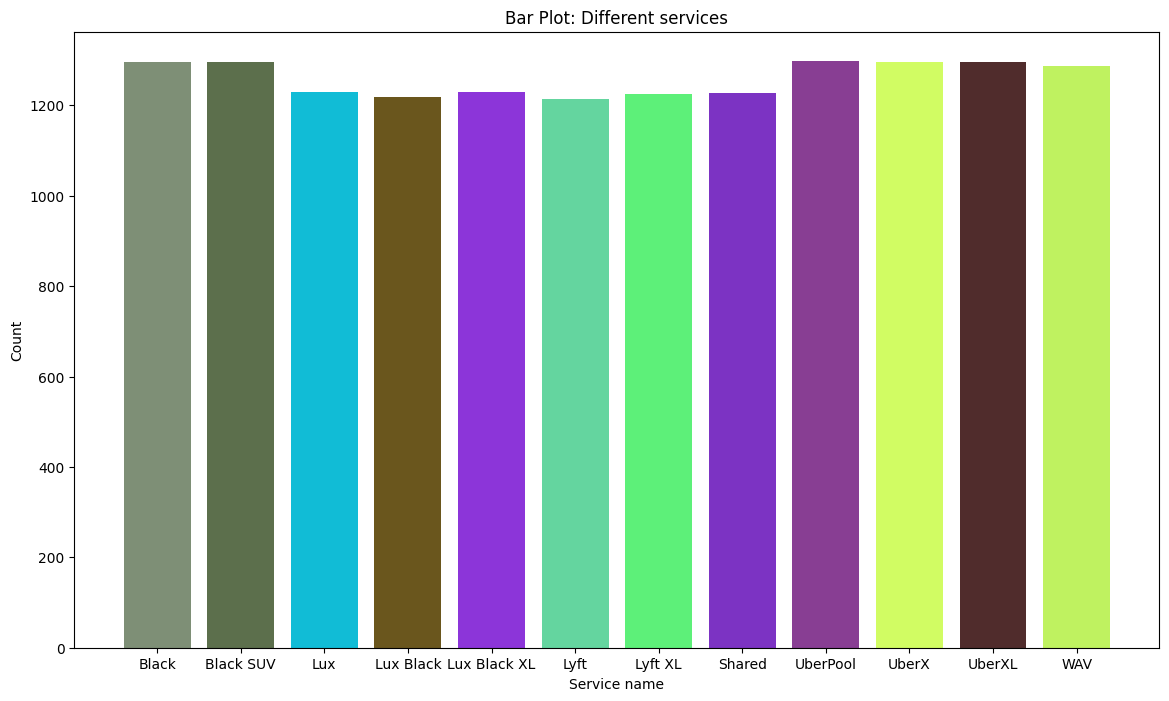

In [ ]:
plt.figure(figsize=(14, 8))
colors = [(random.random(), random.random(), random.random()) for _ in range(len(unique_class))]

plt.bar(unique_class, counts,color=colors)

plt.xlabel('Service name')
plt.ylabel('Count')
plt.title('Bar Plot: Different services')

In [ ]:
# Extrating the required features
rides = ride_clean[(ride_clean['name']=='Lyft')|(ride_clean['name']=='UberX')]
unique_class, counts = np.unique(rides["name"], return_counts=True)
unique_class

array(['Lyft', 'UberX'], dtype=object)

Text(0.5, 1.0, 'Bar Plot: Different services')

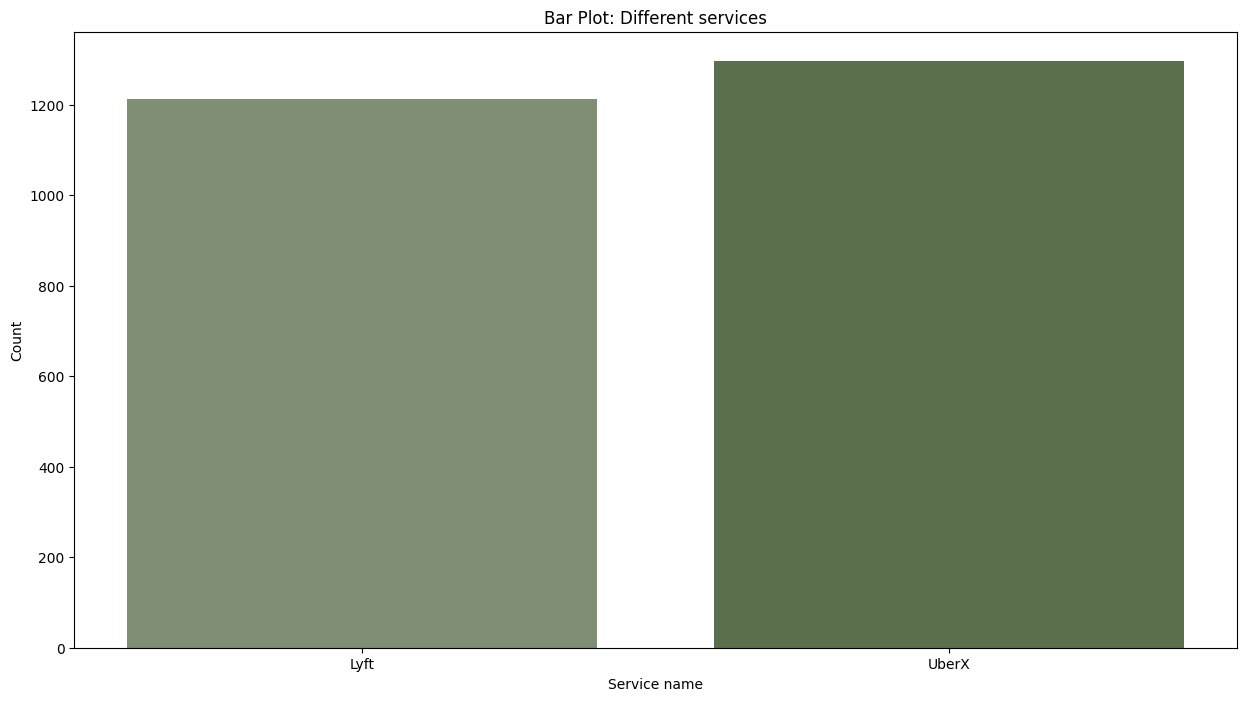

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(unique_class, counts, color=colors)

plt.xlabel('Service name')
plt.ylabel('Count')
plt.title('Bar Plot: Different services')

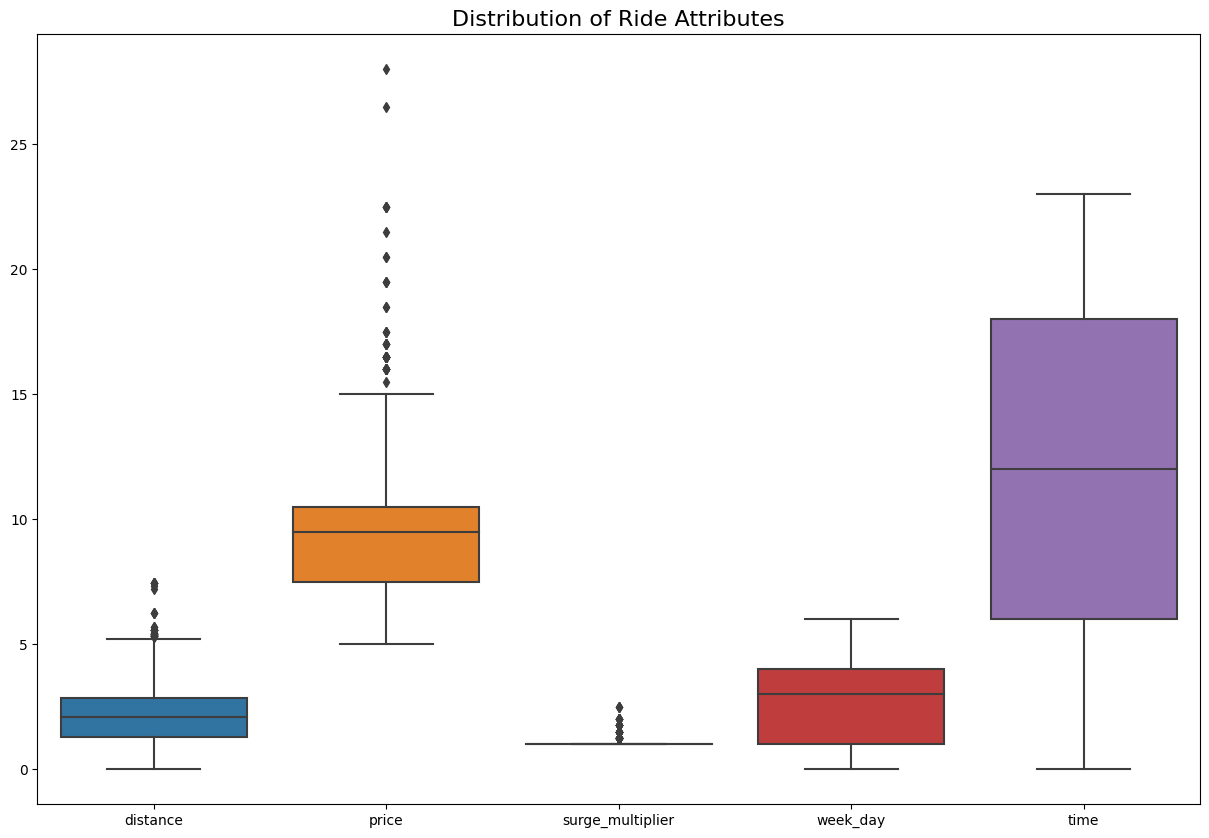

In [ ]:
# Plotting Boxplot to easily find the outliers
columns = ["distance", "price", "surge_multiplier", "week_day", "time"]
plt.figure(figsize=(15, 10))
sns.boxplot(data=rides[columns])
plt.title('Distribution of Ride Attributes', fontsize=16)
plt.show()

In [ ]:
# Grouping Dataframes
grouped_rides = rides.groupby('name')
uber = grouped_rides.get_group('UberX')
lyft = grouped_rides.get_group('Lyft')

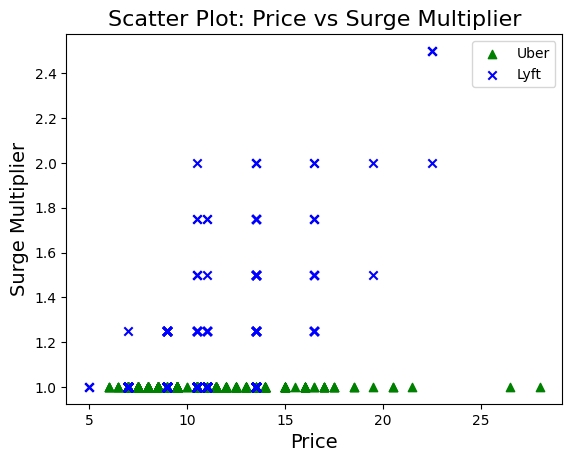

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(uber['price'], uber['surge_multiplier'], c="green", marker="^", label='Uber')
plt.scatter(lyft['price'], lyft['surge_multiplier'], c="blue", marker="x", label='Lyft')

plt.xlabel('Price', fontsize=14)
plt.ylabel('Surge Multiplier', fontsize=14)
plt.title('Scatter Plot: Price vs Surge Multiplier', fontsize=16)

plt.legend()  # Add legend with labels specified in the scatter plots

plt.show()


In [ ]:
unique_class, counts = np.unique(rides["destination"], return_counts=True)
unique_class

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Back Bay'),
  Text(1, 0, 'Beacon Hill'),
  Text(2, 0, 'Boston University'),
  Text(3, 0, 'Fenway'),
  Text(4, 0, 'Financial District'),
  Text(5, 0, 'Haymarket Square'),
  Text(6, 0, 'North End'),
  Text(7, 0, 'North Station'),
  Text(8, 0, 'Northeastern University'),
  Text(9, 0, 'South Station'),
  Text(10, 0, 'Theatre District'),
  Text(11, 0, 'West End')])

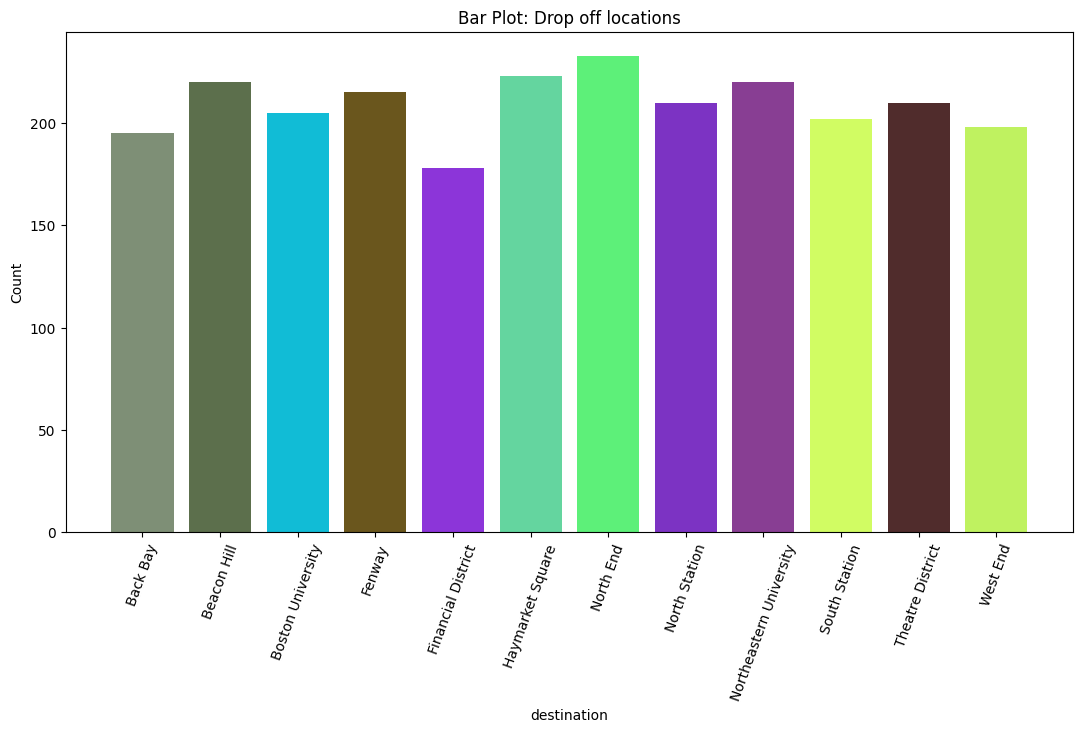

In [ ]:
plt.figure(figsize=(13, 6.5))
plt.bar(unique_class, counts, color=colors)

plt.xlabel('destination')
plt.ylabel('Count')
plt.title('Bar Plot: Drop off locations')
plt.xticks(rotation=70)

In [ ]:
unique_class, counts = np.unique(rides["source"], return_counts=True)
unique_class

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Back Bay'),
  Text(1, 0, 'Beacon Hill'),
  Text(2, 0, 'Boston University'),
  Text(3, 0, 'Fenway'),
  Text(4, 0, 'Financial District'),
  Text(5, 0, 'Haymarket Square'),
  Text(6, 0, 'North End'),
  Text(7, 0, 'North Station'),
  Text(8, 0, 'Northeastern University'),
  Text(9, 0, 'South Station'),
  Text(10, 0, 'Theatre District'),
  Text(11, 0, 'West End')])

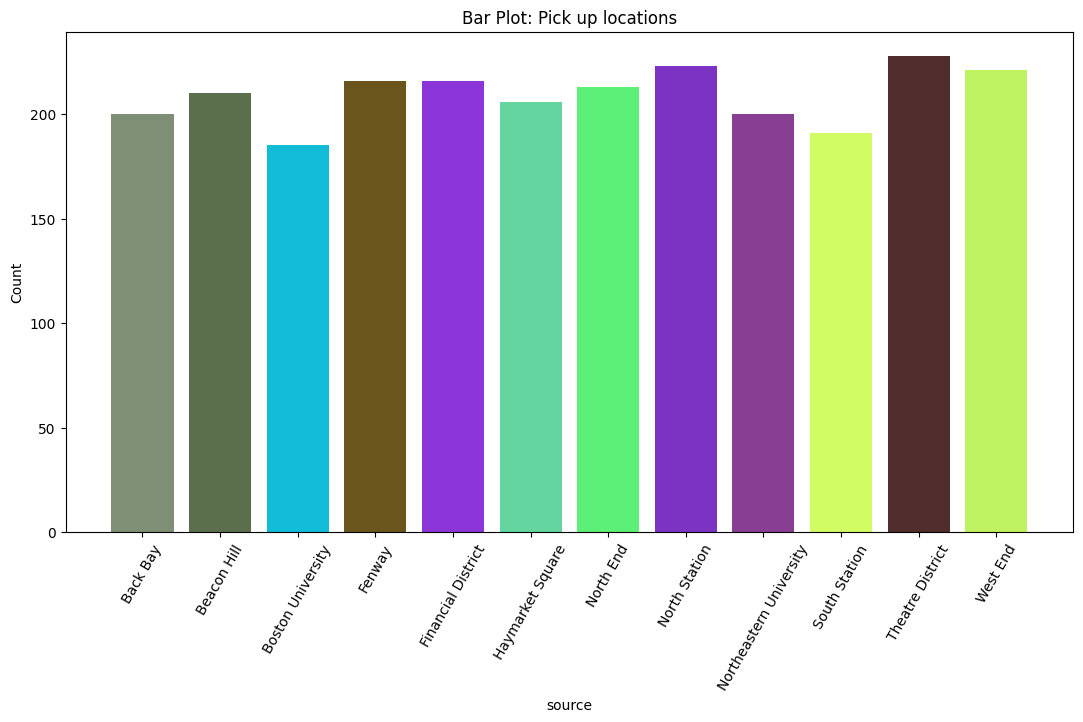

In [ ]:
plt.figure(figsize=(13, 6.5))
plt.bar(unique_class, counts, color=colors)
#lt.rc('font', size=10)
plt.xlabel('source')
plt.ylabel('Count')
plt.title('Bar Plot: Pick up locations')
plt.xticks(rotation=60)

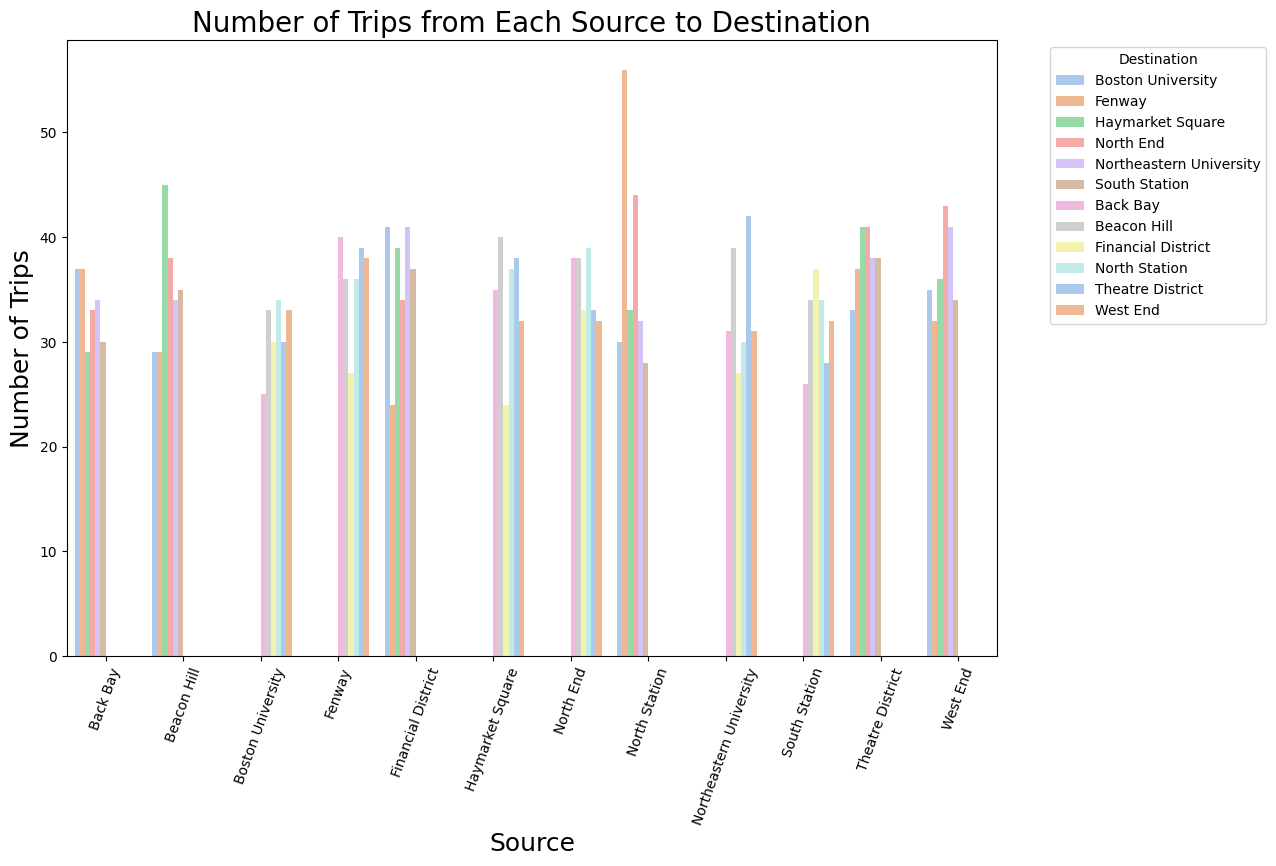

In [ ]:
source_destination_counts = rides.groupby(['source', 'destination']).size().reset_index(name='count')

custom_palette = sns.color_palette("pastel", n_colors=len(source_destination_counts['destination'].unique()))

plt.figure(figsize=(12, 8))

sns.barplot(x='source', y='count', hue='destination', data=source_destination_counts, palette=custom_palette, width=0.8)

plt.xlabel('Source', fontsize=18)
plt.ylabel('Number of Trips', fontsize=18)
plt.title('Number of Trips from Each Source to Destination', fontsize=20)
plt.xticks(rotation=70)
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

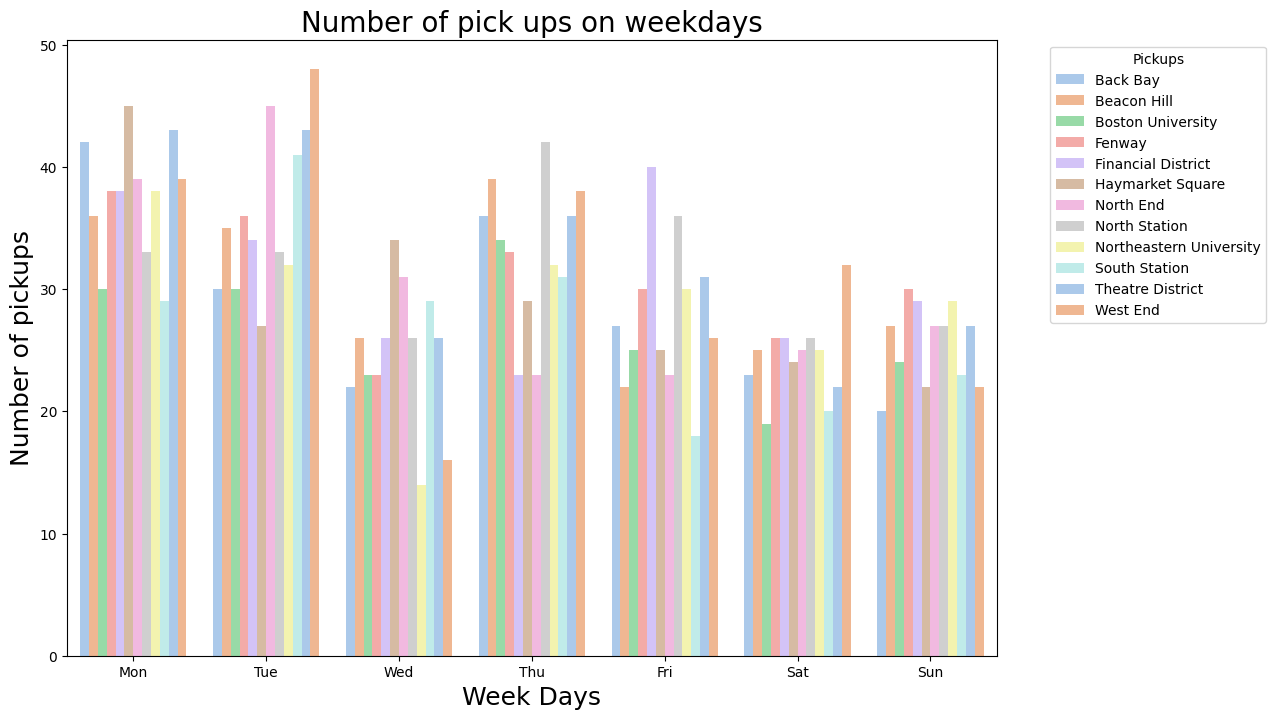

In [ ]:
pickup_on_weekdays = rides.groupby(['week_day', 'source']).size().reset_index(name='count')

custom_palette = sns.color_palette("pastel", n_colors=len(pickup_on_weekdays['source'].unique()))

plt.figure(figsize=(12, 8))

sns.barplot(x='week_day', y='count', hue='source', data=pickup_on_weekdays, palette=custom_palette, width=0.8)

plt.xlabel('Week Days', fontsize=18)
plt.ylabel('Number of pickups', fontsize=18)
plt.title('Number of pick ups on weekdays', fontsize=20)
# plt.xticks(rotation=45)
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.legend(title='Pickups', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

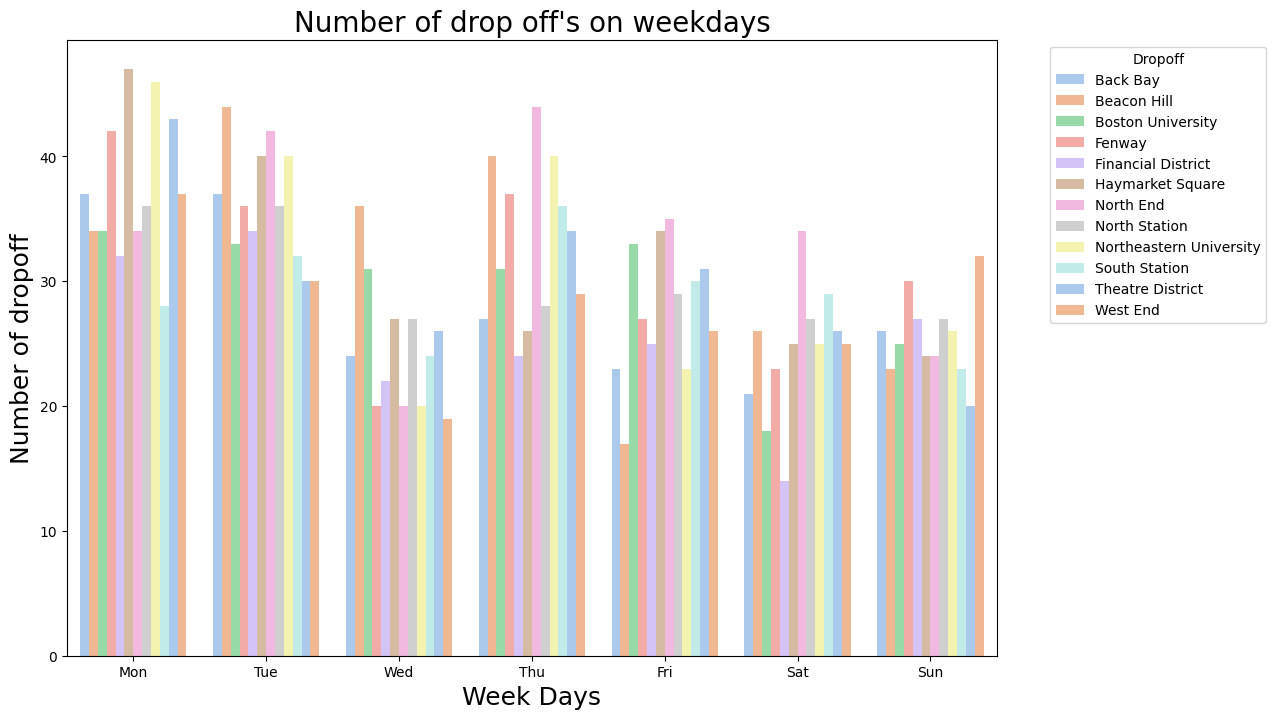

In [ ]:
dropoff_on_weekdays = rides.groupby(['week_day', 'destination']).size().reset_index(name='count')

custom_palette = sns.color_palette("pastel", n_colors=len(dropoff_on_weekdays['destination'].unique()))

plt.figure(figsize=(12, 8))

sns.barplot(x='week_day', y='count', hue='destination', data=dropoff_on_weekdays, palette=custom_palette, width=0.8)

plt.xlabel('Week Days', fontsize=18)
plt.ylabel('Number of dropoff', fontsize=18)
plt.title("Number of drop off's on weekdays", fontsize=20)
# plt.xticks(rotation=45)
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.legend(title='Dropoff', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
source_dest_weekday_counts = rides.groupby(['source', 'destination', 'week_day']).size().reset_index(name='count')
source_dest_weekday_counts

source        destination  week_day  count
0    Back Bay  Boston University         0     10
1    Back Bay  Boston University         1      6
2    Back Bay  Boston University         2      4
3    Back Bay  Boston University         3      4
4    Back Bay  Boston University         4      7
..        ...                ...       ...    ...
497  West End      South Station         1      9
498  West End      South Station         3      3
499  West End      South Station         4      7
500  West End      South Station         5      6
501  West End      South Station         6      2

[502 rows x 4 columns]

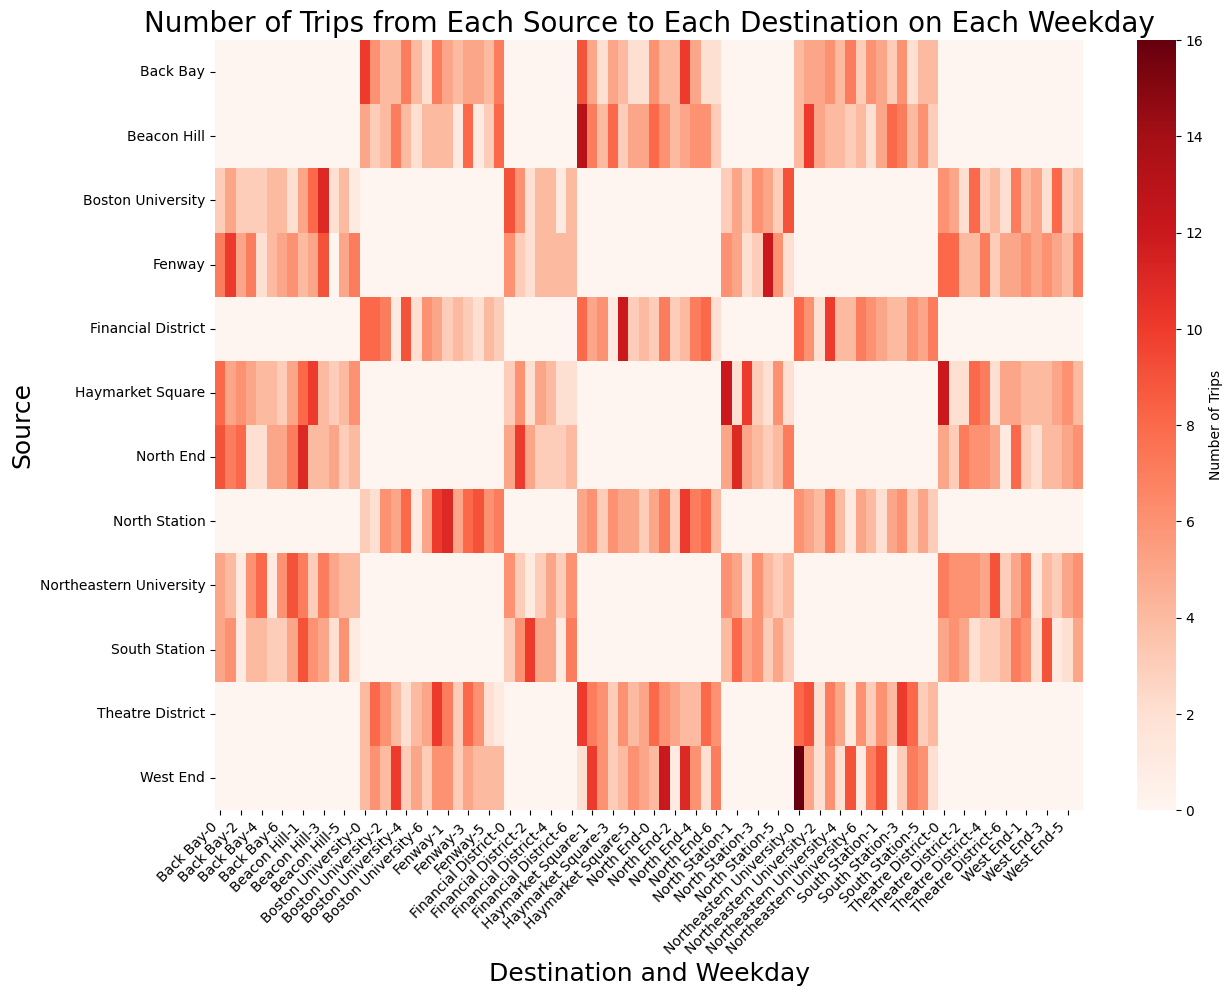

In [ ]:


heatmap_data = source_dest_weekday_counts.pivot_table(index='source', columns=['destination', 'week_day'], values='count', fill_value=0)

plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data, annot=False, cmap="Reds", fmt='g', annot_kws={"size": 10}, cbar_kws={'label': 'Number of Trips'})

plt.xlabel('Destination and Weekday', fontsize=18)
plt.ylabel('Source', fontsize=18)
plt.title('Number of Trips from Each Source to Each Destination on Each Weekday', fontsize=20)
plt.xticks(rotation=45, ha='right')


plt.show()

In [ ]:
source_dest_weekday_counts = uber.groupby(['source', 'destination', 'week_day']).size().reset_index(name='count')
source_dest_weekday_counts

source        destination  week_day  count
0    Back Bay  Boston University         0      7
1    Back Bay  Boston University         1      3
2    Back Bay  Boston University         2      3
3    Back Bay  Boston University         3      4
4    Back Bay  Boston University         4      3
..        ...                ...       ...    ...
460  West End      South Station         1      1
461  West End      South Station         3      2
462  West End      South Station         4      3
463  West End      South Station         5      3
464  West End      South Station         6      1

[465 rows x 4 columns]

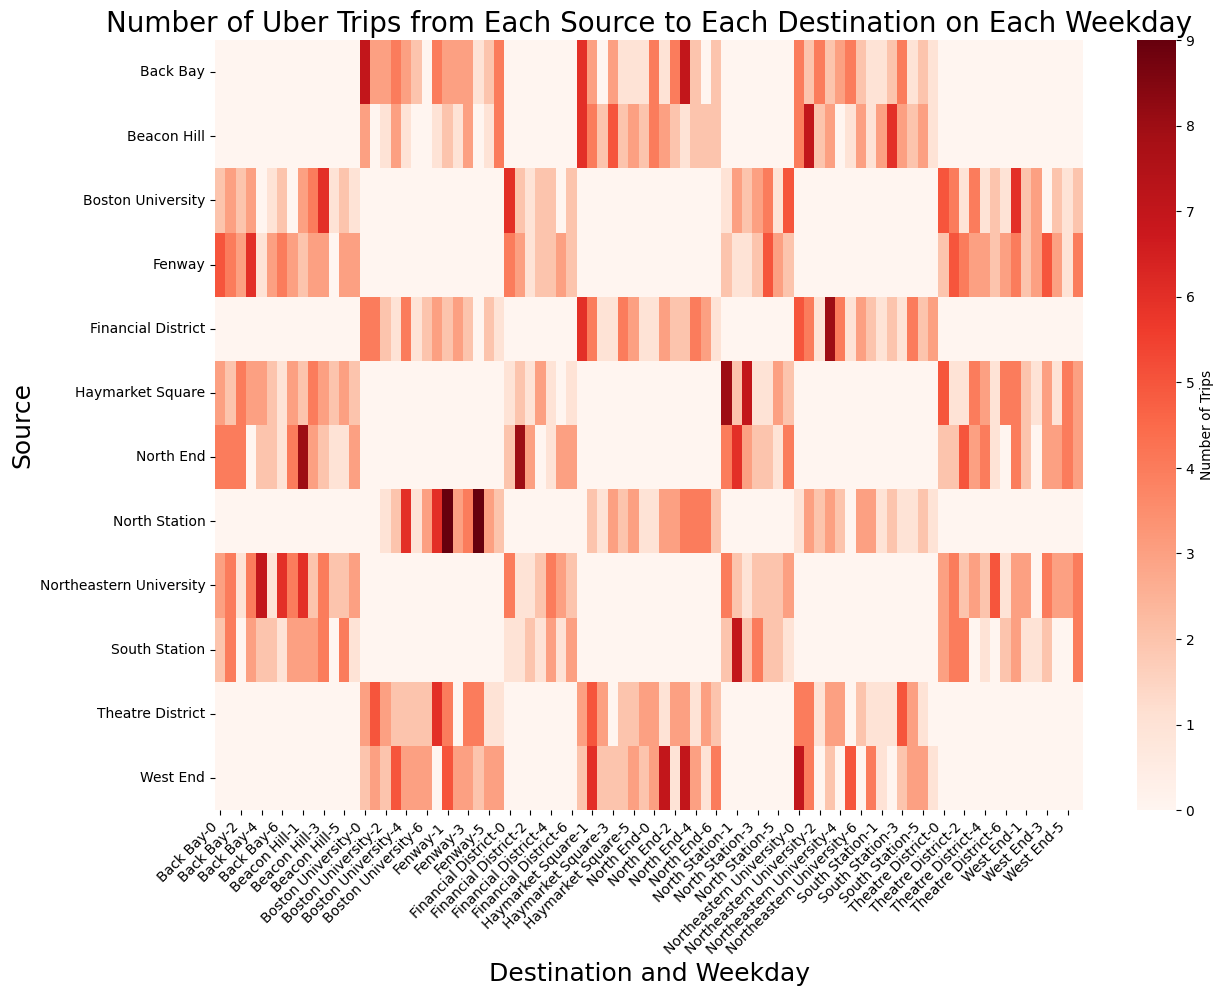

In [ ]:


heatmap_data = source_dest_weekday_counts.pivot_table(index='source', columns=['destination', 'week_day'], values='count', fill_value=0)

plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data, annot=False, cmap="Reds", fmt='g', annot_kws={"size": 10}, cbar_kws={'label': 'Number of Trips'})

plt.xlabel('Destination and Weekday', fontsize=18)
plt.ylabel('Source', fontsize=18)
plt.title('Number of Uber Trips from Each Source to Each Destination on Each Weekday', fontsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
source_dest_weekday_counts = lyft.groupby(['source', 'destination', 'week_day']).size().reset_index(name='count')
source_dest_weekday_counts

source        destination  week_day  count
0    Back Bay  Boston University         0      3
1    Back Bay  Boston University         1      3
2    Back Bay  Boston University         2      1
3    Back Bay  Boston University         4      4
4    Back Bay  Boston University         5      2
..        ...                ...       ...    ...
458  West End      South Station         1      8
459  West End      South Station         3      1
460  West End      South Station         4      4
461  West End      South Station         5      3
462  West End      South Station         6      1

[463 rows x 4 columns]

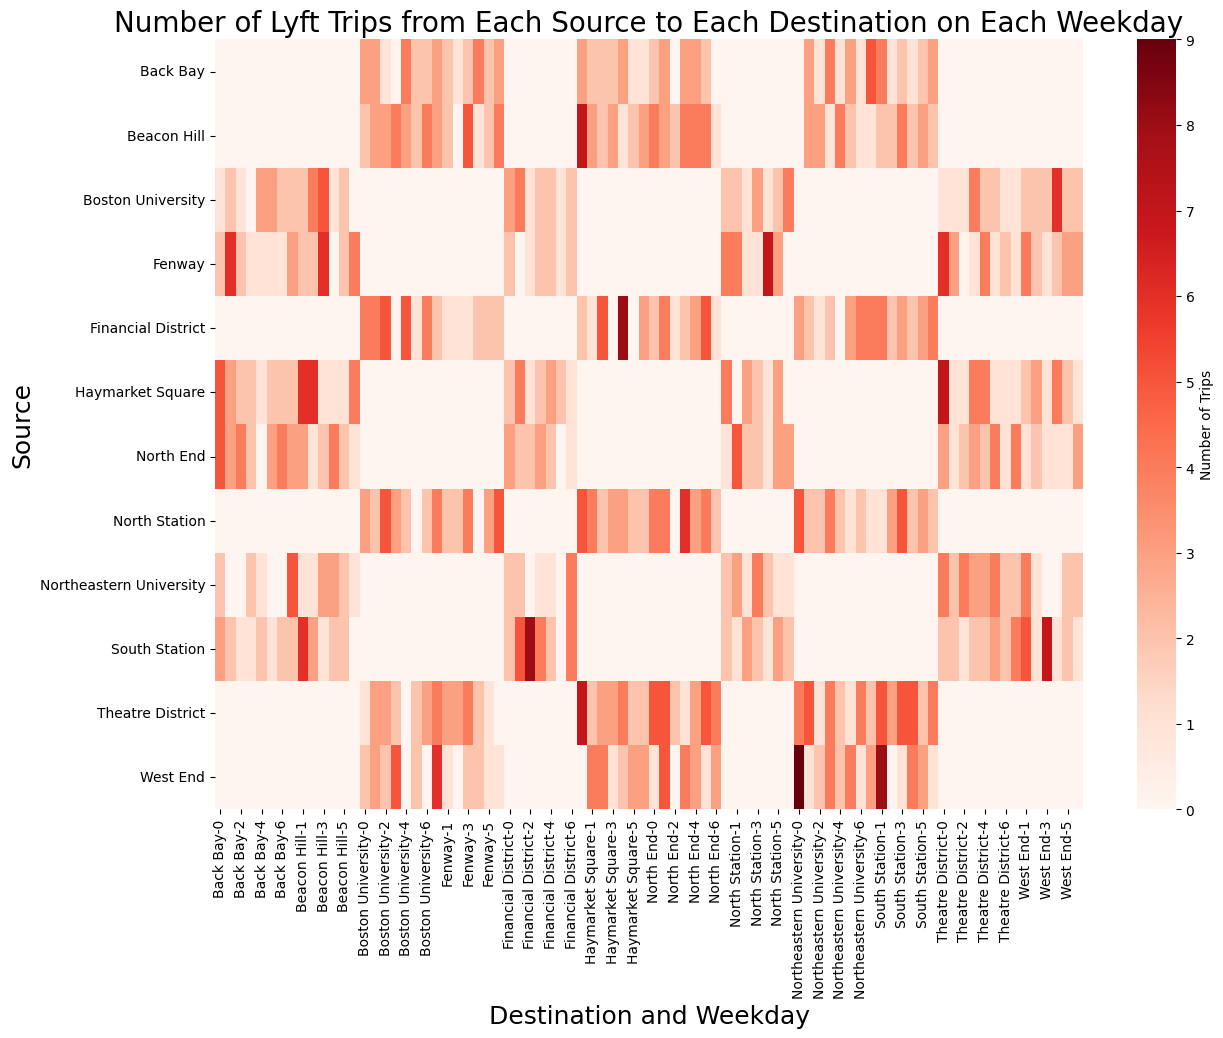

In [ ]:


heatmap_data = source_dest_weekday_counts.pivot_table(index='source', columns=['destination', 'week_day'], values='count', fill_value=0)

plt.figure(figsize=(14, 10))

sns.heatmap(heatmap_data, annot=False, cmap="Reds", fmt='g', annot_kws={"size": 10}, cbar_kws={'label': 'Number of Trips'})

plt.xlabel('Destination and Weekday', fontsize=18)
plt.ylabel('Source', fontsize=18)
plt.title('Number of Lyft Trips from Each Source to Each Destination on Each Weekday', fontsize=20)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 46.5% of the points cannot be plac

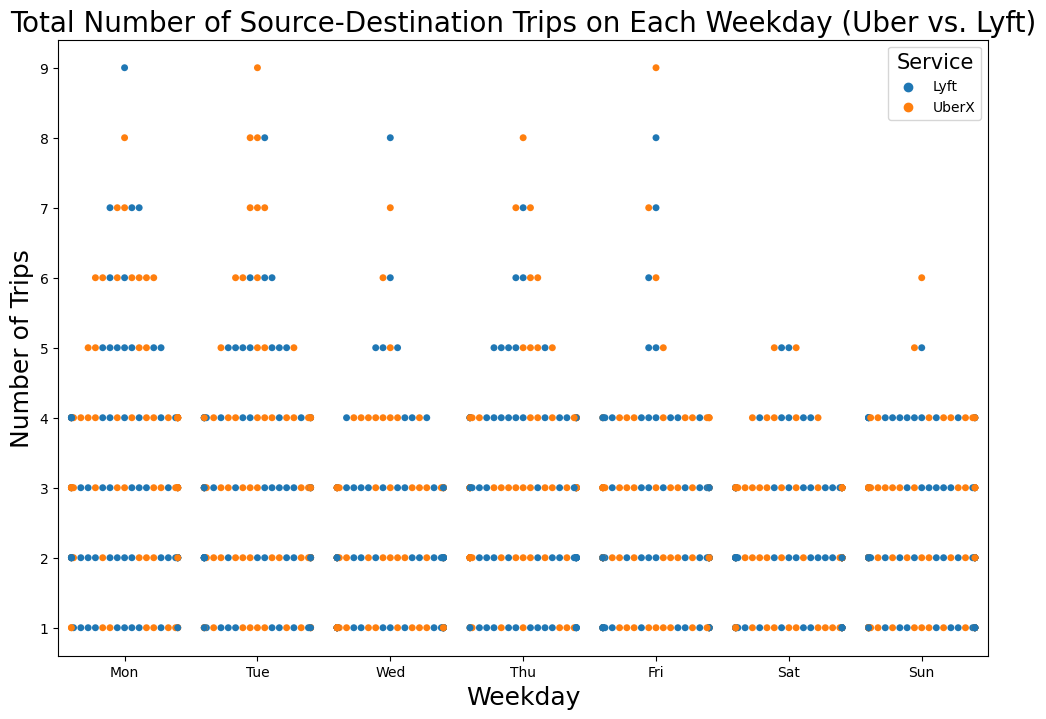

In [ ]:
import warnings

source_dest_service_weekday_counts = rides.groupby(['source', 'destination', 'name', 'week_day']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))

sns.swarmplot(x='week_day', y='count', hue='name', data=source_dest_service_weekday_counts, size=5)

plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Number of Trips', fontsize=18)
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.title('Total Number of Source-Destination Trips on Each Weekday (Uber vs. Lyft)', fontsize=20)

plt.legend(title='Service', title_fontsize='15')
warnings.filterwarnings("ignore")

plt.show()



In [ ]:
source_counts = rides.groupby(['name', 'week_day', 'source']).size().reset_index(name='count')
destination_counts = rides.groupby(['name', 'week_day', 'destination']).size().reset_index(name='count')

print(source_counts.head)
print(destination_counts.head)

<bound method NDFrame.head of       name  week_day                   source  count
0     Lyft         0                 Back Bay     16
1     Lyft         0              Beacon Hill     17
2     Lyft         0        Boston University     10
3     Lyft         0                   Fenway     18
4     Lyft         0       Financial District     17
..     ...       ...                      ...    ...
163  UberX         6            North Station     12
164  UberX         6  Northeastern University     19
165  UberX         6            South Station     12
166  UberX         6         Theatre District     10
167  UberX         6                 West End     13

[168 rows x 4 columns]>
<bound method NDFrame.head of       name  week_day              destination  count
0     Lyft         0                 Back Bay     18
1     Lyft         0              Beacon Hill     17
2     Lyft         0        Boston University     15
3     Lyft         0                   Fenway     22
4     Lyft    

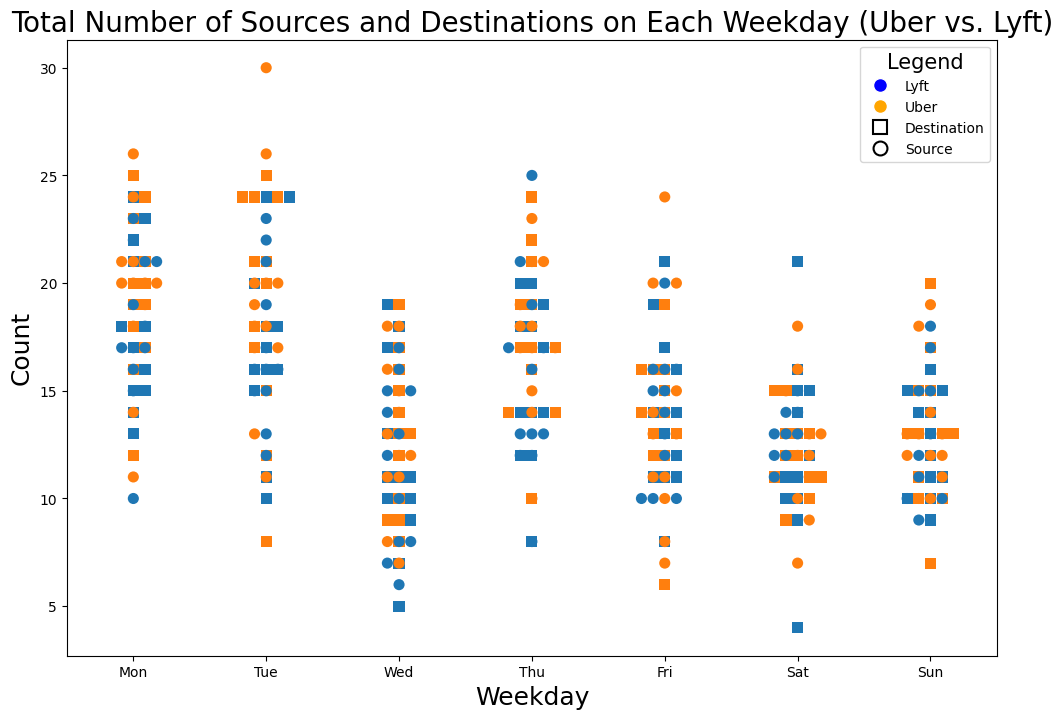

In [ ]:
plt.figure(figsize=(12, 8))

# Create a dot plot using seaborn's swarmplot for destination
sns.swarmplot(x='week_day', y='count', hue='name', data=destination_counts, size=8, marker='s', label='Destination')

# Create a dot plot using seaborn's swarmplot for source
sns.swarmplot(x='week_day', y='count', hue='name', data=source_counts, size=8, marker='o', label='Source')

# Set labels and title
plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.title('Total Number of Sources and Destinations on Each Weekday (Uber vs. Lyft)', fontsize=20)

# Show the legend
custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Lyft'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Uber'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='white', markersize=10, label='Destination', markeredgewidth=1.5, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Source', markeredgewidth=1.5, markeredgecolor='black')
]
plt.legend(handles=custom_legend, title='Legend', title_fontsize='15')

# Show the plot
plt.show()

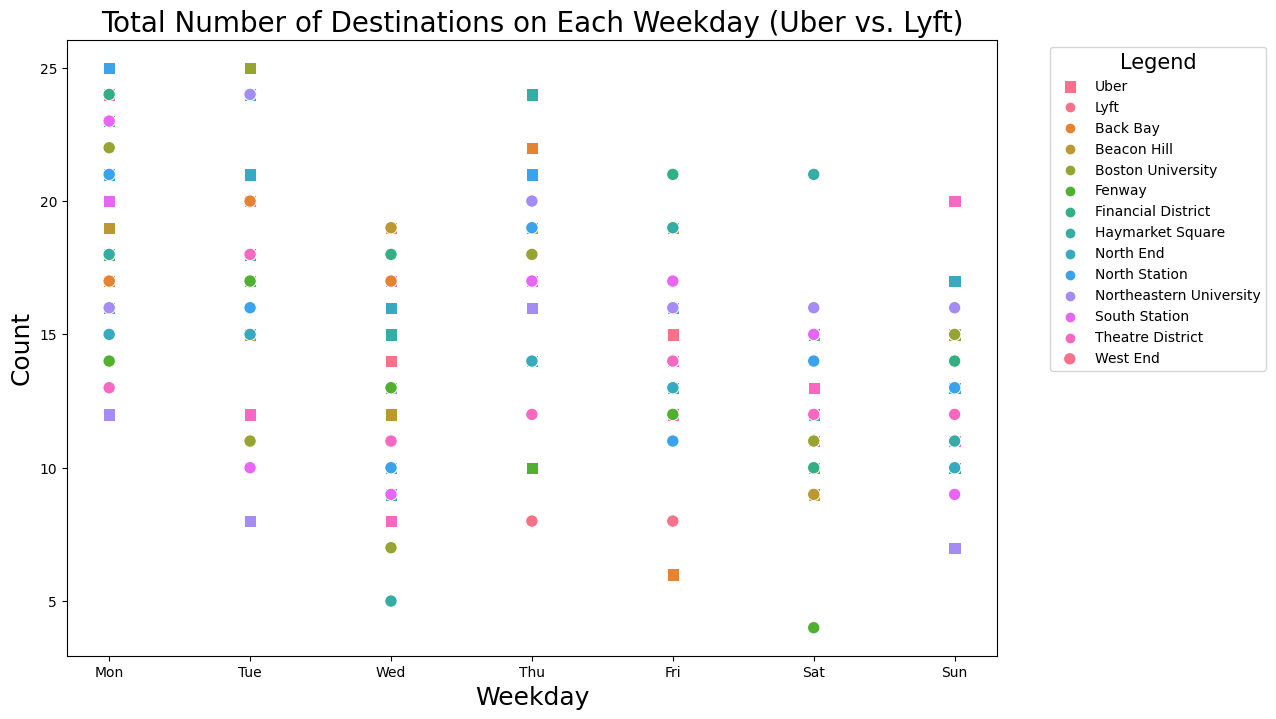

In [ ]:
plt.figure(figsize=(12, 8))

custom_palette = sns.color_palette("dark", n_colors=len(destination_counts['destination'].unique()))

sns.scatterplot(x='week_day', y='count', hue='destination', data=destination_counts[destination_counts['name'] == 'UberX'], s=80, marker='s', label='Uber')

sns.scatterplot(x='week_day', y='count', hue='destination', data=destination_counts[destination_counts['name'] == 'Lyft'], s=80, marker='o', label='Lyft')

plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.title('Total Number of Destinations on Each Weekday (Uber vs. Lyft)', fontsize=20)


legend_labels = ["Uber", "Lyft"] + list(destination_counts['destination'].unique())
plt.legend(title='Legend', title_fontsize='15', bbox_to_anchor=(1.05, 1), loc='upper left', labels=legend_labels)

plt.show()

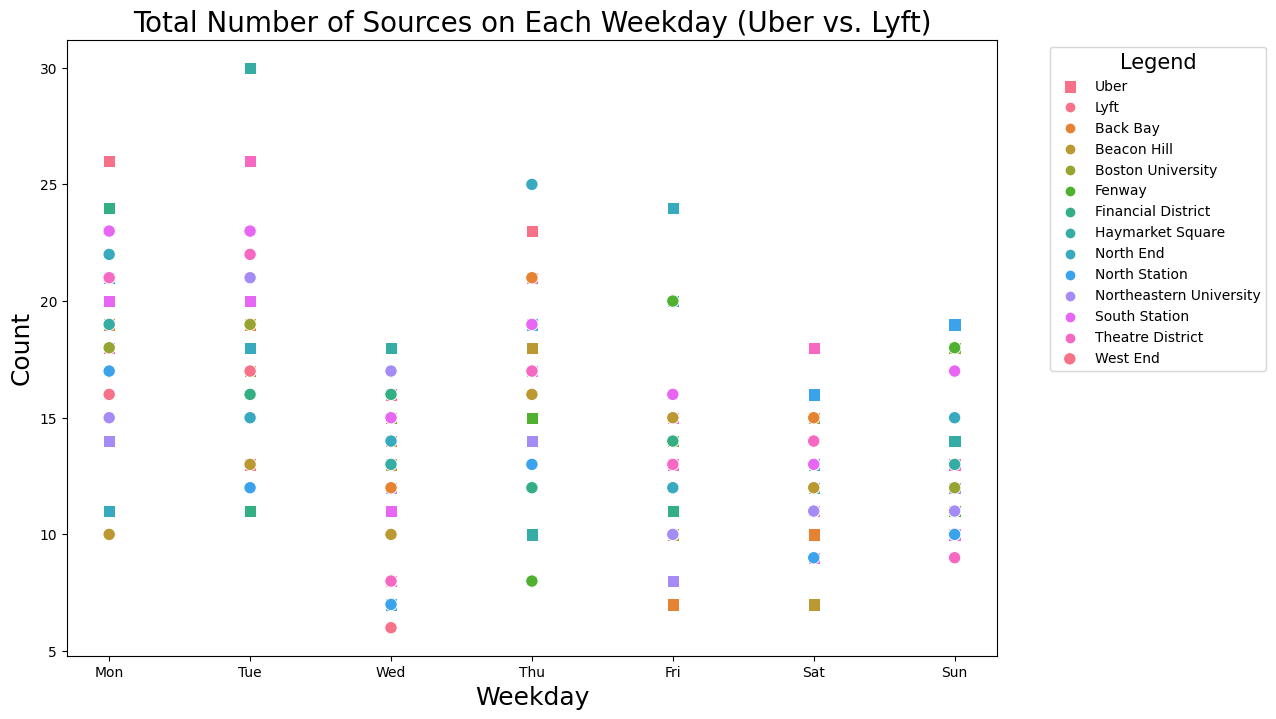

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='week_day', y='count', hue='source', data=source_counts[source_counts['name'] == 'UberX'], s=80, marker='s', label='Uber')

sns.scatterplot(x='week_day', y='count', hue='source', data=source_counts[source_counts['name'] == 'Lyft'], s=80, marker='o', label='Lyft')

plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.title('Total Number of Sources on Each Weekday (Uber vs. Lyft)', fontsize=20)


legend_labels = ["Uber", "Lyft"] + list(source_counts['source'].unique())
plt.legend(title='Legend', title_fontsize='15', bbox_to_anchor=(1.05, 1), loc='upper left', labels=legend_labels)

plt.show()

In [ ]:
def no_of_rides_weekdays(source_uber, source_lyft, name):
  rides_per_weekday_uber = source_uber['week_day'].value_counts().sort_index()
  rides_per_weekday_lyft = source_lyft['week_day'].value_counts().sort_index()

  plt.figure(figsize=(10, 6))

  sns.lineplot(x=rides_per_weekday_uber.index, y=rides_per_weekday_uber.values, marker='o', label='Uber')

  sns.lineplot(x=rides_per_weekday_lyft.index, y=rides_per_weekday_lyft.values, marker='o', label='Lyft')

  plt.xlabel('Weekday', fontsize=14)
  plt.ylabel('Number of Rides', fontsize=14)
  plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
  plt.title('Number of Rides over the Weekdays for '+name+' (Uber vs. Lyft)', fontsize=16)

  plt.legend()

  plt.show()

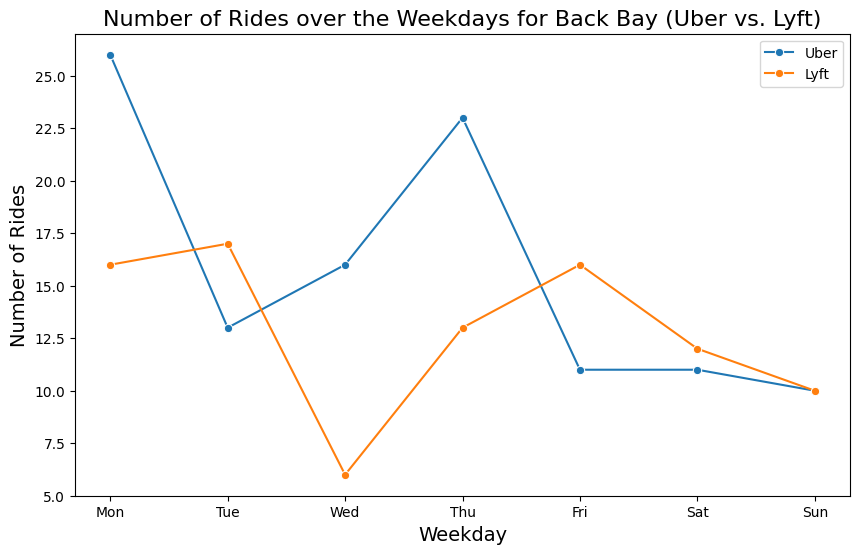

In [ ]:

source_uber = uber[rides['source'] == 'Back Bay']
source_lyft = lyft[rides['source'] == 'Back Bay']

no_of_rides_weekdays(source_uber, source_lyft, 'Back Bay')

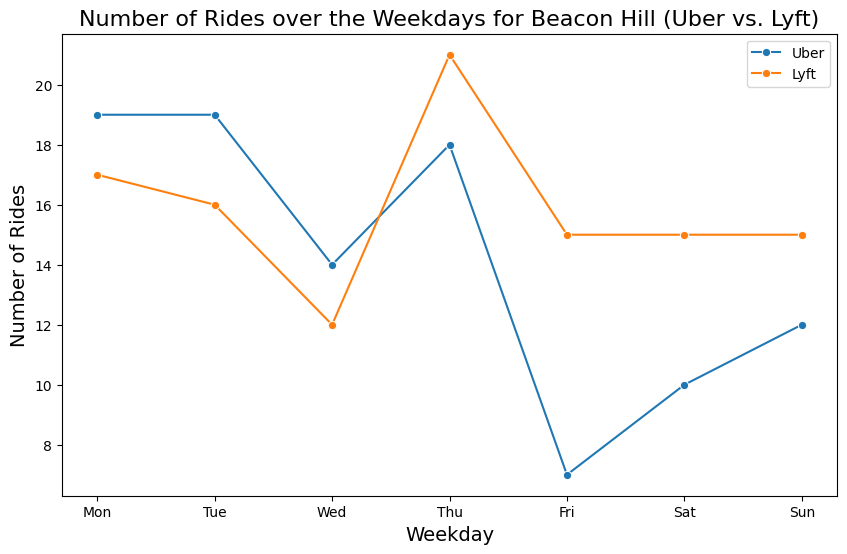

In [ ]:
source_uber = uber[rides['source'] == 'Beacon Hill']
source_lyft = lyft[rides['source'] == 'Beacon Hill']

no_of_rides_weekdays(source_uber, source_lyft, 'Beacon Hill')

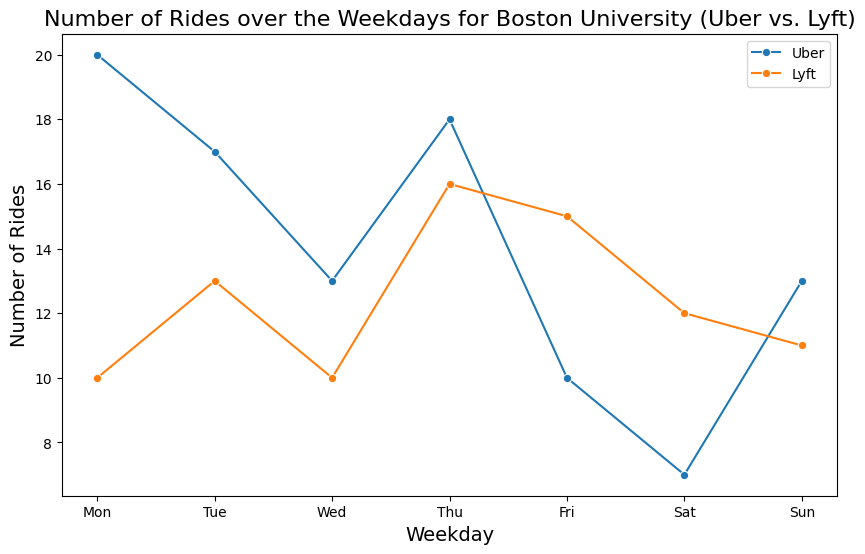

In [ ]:
source_uber = uber[rides['source'] == 'Boston University']
source_lyft = lyft[rides['source'] == 'Boston University']

no_of_rides_weekdays(source_uber, source_lyft, 'Boston University')

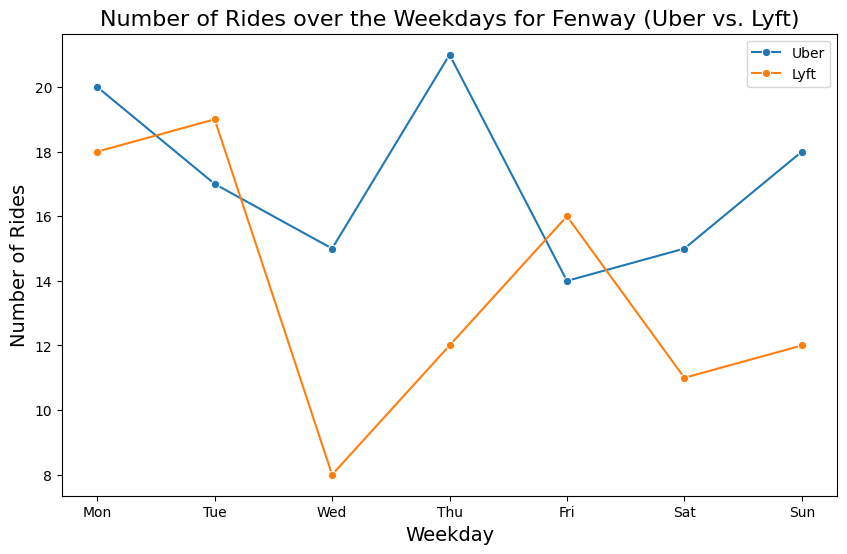

In [ ]:
source_uber = uber[rides['source'] == 'Fenway']
source_lyft = lyft[rides['source'] == 'Fenway']

no_of_rides_weekdays(source_uber, source_lyft, 'Fenway')

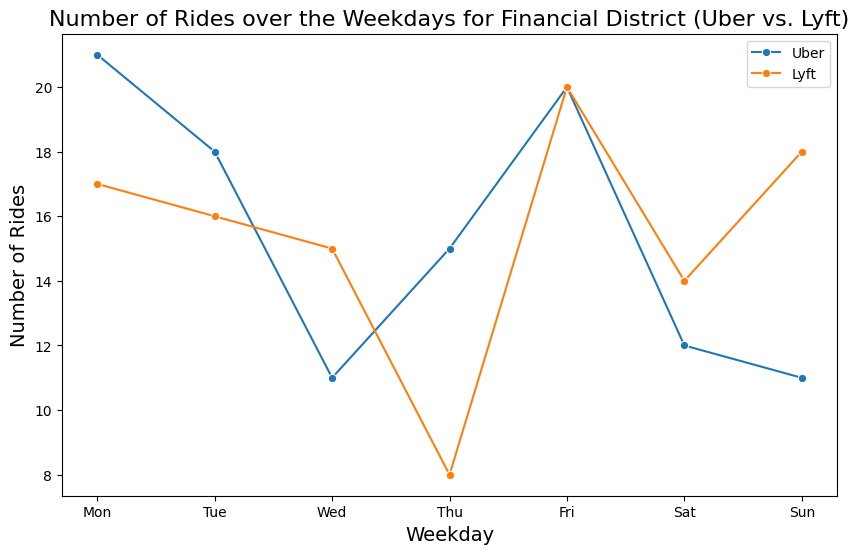

In [ ]:
source_uber = uber[rides['source'] == 'Financial District']
source_lyft = lyft[rides['source'] == 'Financial District']

no_of_rides_weekdays(source_uber, source_lyft, 'Financial District')

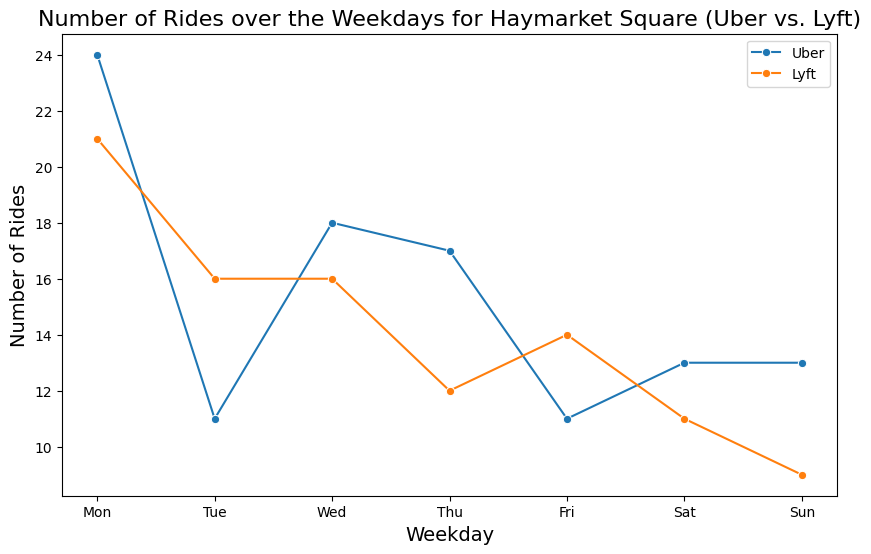

In [ ]:
source_uber = uber[rides['source'] == 'Haymarket Square']
source_lyft = lyft[rides['source'] == 'Haymarket Square']

no_of_rides_weekdays(source_uber, source_lyft, 'Haymarket Square')

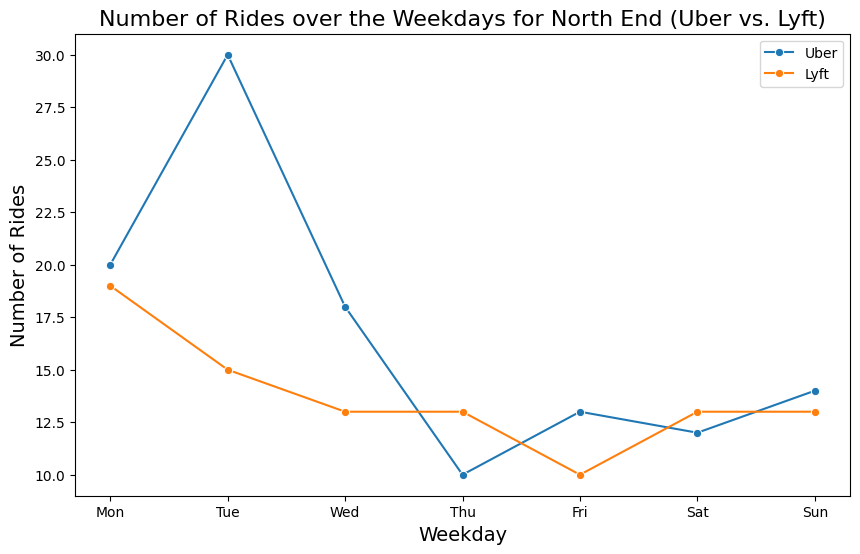

In [ ]:
source_uber = uber[rides['source'] == 'North End']
source_lyft = lyft[rides['source'] == 'North End']

no_of_rides_weekdays(source_uber, source_lyft, 'North End')

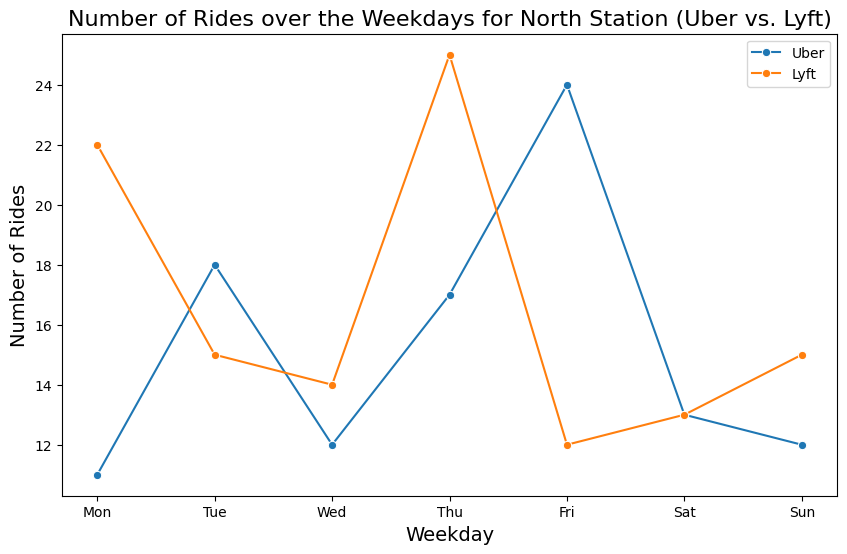

In [ ]:
source_uber = uber[rides['source'] == 'North Station']
source_lyft = lyft[rides['source'] == 'North Station']

no_of_rides_weekdays(source_uber, source_lyft, 'North Station')

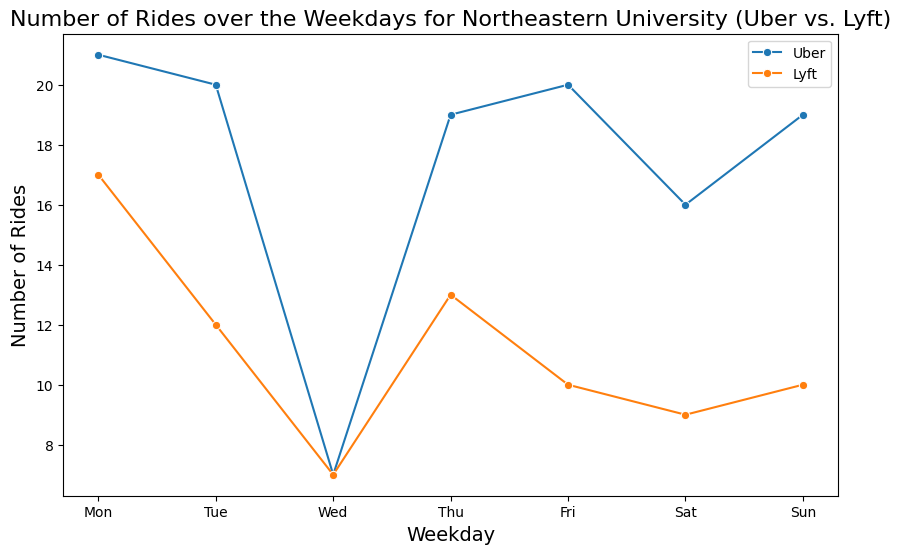

In [ ]:
source_uber = uber[rides['source'] == 'Northeastern University']
source_lyft = lyft[rides['source'] == 'Northeastern University']

no_of_rides_weekdays(source_uber, source_lyft, 'Northeastern University')

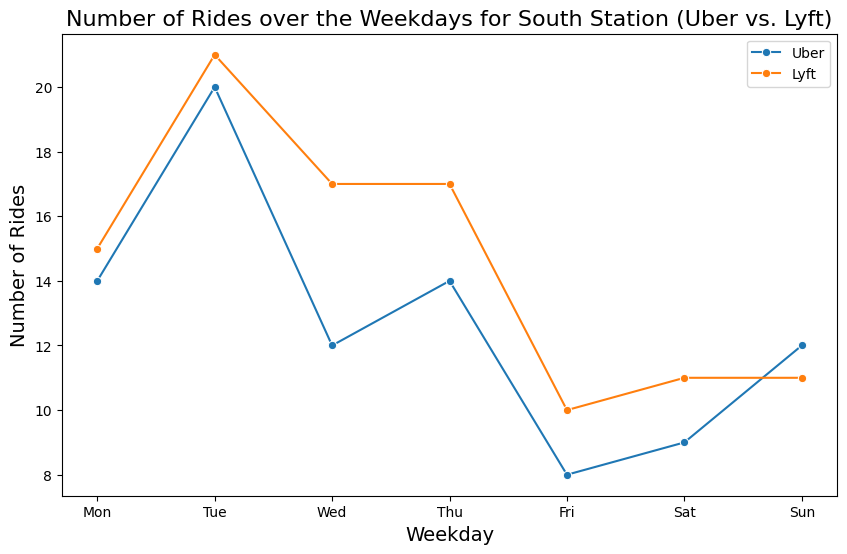

In [ ]:
source_uber = uber[rides['source'] == 'South Station']
source_lyft = lyft[rides['source'] == 'South Station']

no_of_rides_weekdays(source_uber, source_lyft, 'South Station')

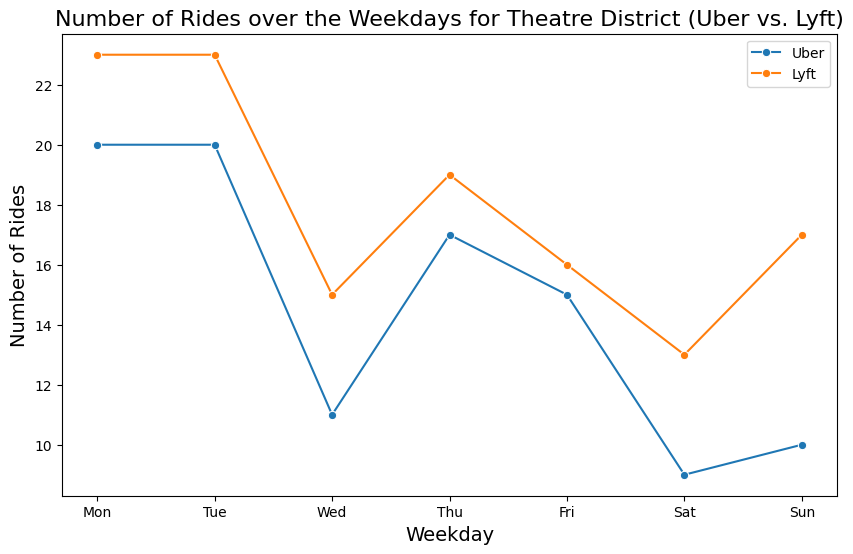

In [ ]:
source_uber = uber[rides['source'] == 'Theatre District']
source_lyft = lyft[rides['source'] == 'Theatre District']

no_of_rides_weekdays(source_uber, source_lyft, 'Theatre District')

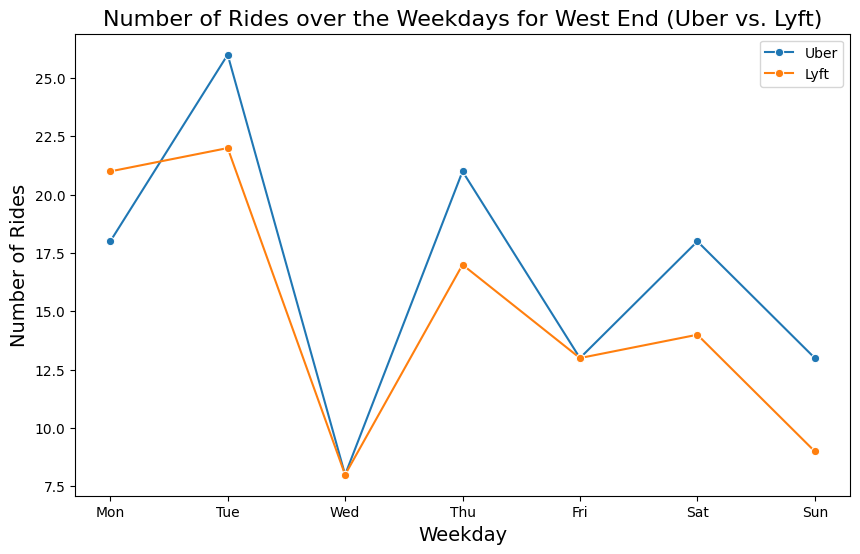

In [ ]:
source_uber = uber[rides['source'] == 'West End']
source_lyft = lyft[rides['source'] == 'West End']

no_of_rides_weekdays(source_uber, source_lyft, 'West End')

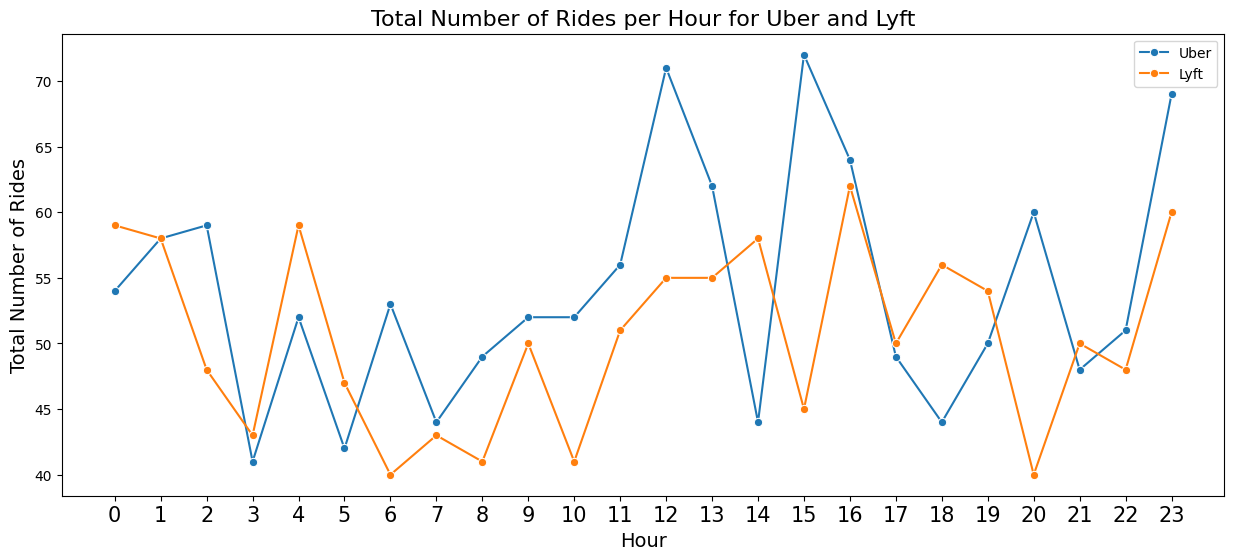

In [ ]:
rides_per_hour_uber = uber['time'].value_counts().sort_index()
rides_per_hour_lyft = lyft['time'].value_counts().sort_index()

# Set up the plot
plt.figure(figsize=(15, 6))

# Plot the total number of rides per hour for Uber
sns.lineplot(x=rides_per_hour_uber.index, y=rides_per_hour_uber.values, marker='o', label='Uber')

# Plot the total number of rides per hour for Lyft
sns.lineplot(x=rides_per_hour_lyft.index, y=rides_per_hour_lyft.values, marker='o', label='Lyft')

# Set labels and title
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Number of Rides', fontsize=14)
plt.title('Total Number of Rides per Hour for Uber and Lyft', fontsize=16)
plt.xticks(np.arange(0,24,1),fontsize=15)

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
count = rides.isna().sum().sum()
count

0

In [ ]:
#columns_to_drop = ['surge_multiplier', 'id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']

In [ ]:
X = rides.drop(columns_to_drop, axis=1)
y = rides['cab_type']
X

distance              destination            source  price  \
2          0.44            North Station  Haymarket Square    7.0   
11         1.08  Northeastern University          Back Bay    7.0   
14         1.11                 West End         North End    7.5   
21         0.72         Haymarket Square     North Station    7.0   
28         2.48            South Station       Beacon Hill    8.5   
...         ...                      ...               ...    ...   
16370      3.61                 Back Bay         North End   12.0   
16377      2.82                 West End            Fenway   11.0   
16385      2.17            South Station     North Station    8.5   
16396      0.49            North Station  Haymarket Square    8.5   
16403      3.44                 Back Bay     South Station   10.5   

       surge_multiplier  time  week_day  
2                   1.0     1         2  
11                  1.0    19         2  
14                  1.0    19         3  
21                  1.0    11         1  
28                  1.0    10         3  
...                 ...   ...       ...  
16370               1.0    16         2  
16377               1.0    18         5  
16385               1.0     7         5  
16396               1.0     5         5  
16403               1.0     9         3  

[2509 rows x 7 columns]

In [ ]:
# Define the replacement dictionaries
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
#X['date'] = X['date'].astype(str)
X

distance  destination  source  price  surge_multiplier  time  week_day
2          0.44            7       5    7.0               1.0     1         2
11         1.08            8       0    7.0               1.0    19         2
14         1.11           11       6    7.5               1.0    19         3
21         0.72            5       7    7.0               1.0    11         1
28         2.48            9       1    8.5               1.0    10         3
...         ...          ...     ...    ...               ...   ...       ...
16370      3.61            0       6   12.0               1.0    16         2
16377      2.82           11       3   11.0               1.0    18         5
16385      2.17            9       7    8.5               1.0     7         5
16396      0.49            7       5    8.5               1.0     5         5
16403      3.44            0       9   10.5               1.0     9         3

[2509 rows x 7 columns]

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

2        1
11       1
14       0
21       1
28       0
        ..
16370    0
16377    1
16385    0
16396    0
16403    0
Name: cab_type, Length: 2509, dtype: int64

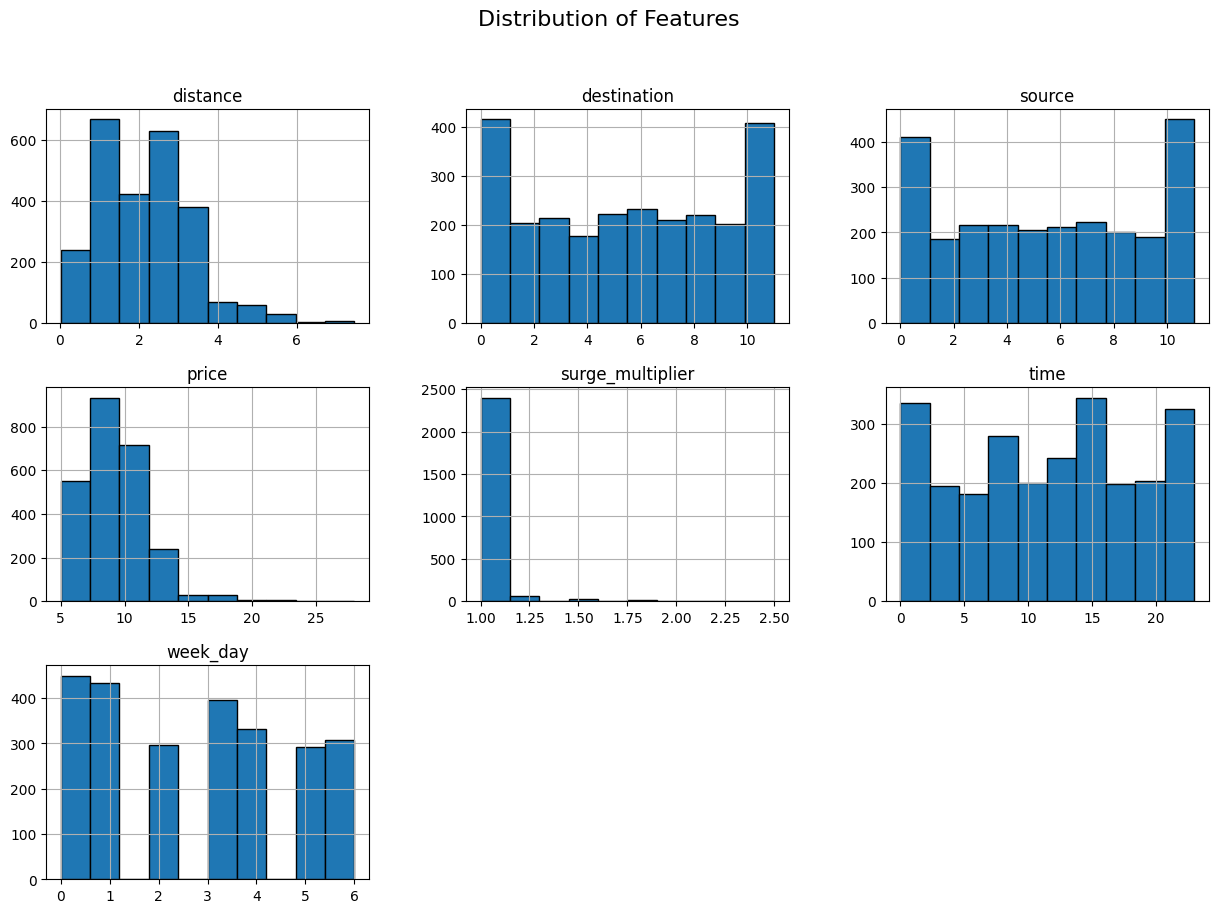

In [ ]:
features = X._get_numeric_data()
features.hist(bins=10, edgecolor='k', figsize=(15, 10))
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

#SVM Algorithm before merging the datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc_clf.predict(X_test)

##Evaluating the model on the basis of various metrics

In [ ]:
Precision= precision_score(y_test, y_pred, average='weighted')
F1_Score= f1_score(y_test, y_pred, average='weighted')
Recall= recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Recall :', Recall)
print('Precision :', Precision)
print('F1-SCore :', F1_Score)

Accuracy: 0.48738379814077026
Recall : 0.20604395604395603
Precision : 0.47041863633273284
F1-SCore : 0.4463050909660839


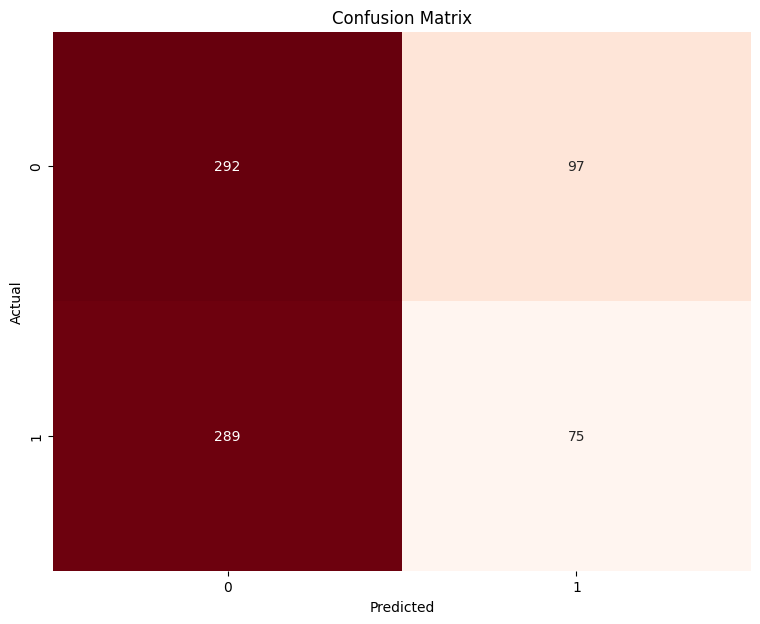

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Splitting the dataset and training the model uing logistic regression

In [ ]:
#columns_to_drop = ['surge_multiplier', 'id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']

In [ ]:
X = rides.drop(columns_to_drop, axis=1)
y = rides['cab_type']
X

distance              destination            source  price  \
2          0.44            North Station  Haymarket Square    7.0   
11         1.08  Northeastern University          Back Bay    7.0   
14         1.11                 West End         North End    7.5   
21         0.72         Haymarket Square     North Station    7.0   
28         2.48            South Station       Beacon Hill    8.5   
...         ...                      ...               ...    ...   
16370      3.61                 Back Bay         North End   12.0   
16377      2.82                 West End            Fenway   11.0   
16385      2.17            South Station     North Station    8.5   
16396      0.49            North Station  Haymarket Square    8.5   
16403      3.44                 Back Bay     South Station   10.5   

       surge_multiplier  time  week_day  
2                   1.0     1         2  
11                  1.0    19         2  
14                  1.0    19         3  
21                  1.0    11         1  
28                  1.0    10         3  
...                 ...   ...       ...  
16370               1.0    16         2  
16377               1.0    18         5  
16385               1.0     7         5  
16396               1.0     5         5  
16403               1.0     9         3  

[2509 rows x 7 columns]

In [ ]:
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
#X['date'] = X['date'].astype(str)

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

2        1
11       1
14       0
21       1
28       0
        ..
16370    0
16377    1
16385    0
16396    0
16403    0
Name: cab_type, Length: 2509, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

##Evaluating the model using various metrics

In [ ]:
y_pred =logistic_regression.predict(X_test)
f1score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("f1_score", f1score)
print("precision", precision)
print("recall", recall)

f1_score 0.5178571428571429
precision 0.564935064935065
recall 0.47802197802197804


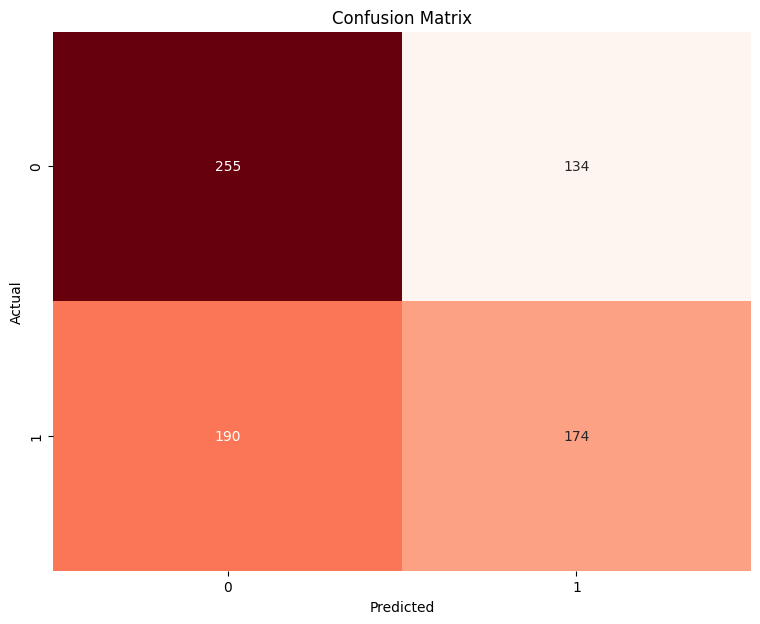

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Splitting the dataset and training the model uing KNN

In [ ]:
#columns_to_drop = ['surge_multiplier', 'id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date']

In [ ]:
X = rides.drop(columns_to_drop, axis=1)
y = rides['cab_type']
X

distance              destination            source  price  \
2          0.44            North Station  Haymarket Square    7.0   
11         1.08  Northeastern University          Back Bay    7.0   
14         1.11                 West End         North End    7.5   
21         0.72         Haymarket Square     North Station    7.0   
28         2.48            South Station       Beacon Hill    8.5   
...         ...                      ...               ...    ...   
16370      3.61                 Back Bay         North End   12.0   
16377      2.82                 West End            Fenway   11.0   
16385      2.17            South Station     North Station    8.5   
16396      0.49            North Station  Haymarket Square    8.5   
16403      3.44                 Back Bay     South Station   10.5   

       surge_multiplier  time  week_day  
2                   1.0     1         2  
11                  1.0    19         2  
14                  1.0    19         3  
21                  1.0    11         1  
28                  1.0    10         3  
...                 ...   ...       ...  
16370               1.0    16         2  
16377               1.0    18         5  
16385               1.0     7         5  
16396               1.0     5         5  
16403               1.0     9         3  

[2509 rows x 7 columns]

In [ ]:
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
#X['date'] = X['date'].astype(str)
X

distance  destination  source  price  surge_multiplier  time  week_day
2          0.44            7       5    7.0               1.0     1         2
11         1.08            8       0    7.0               1.0    19         2
14         1.11           11       6    7.5               1.0    19         3
21         0.72            5       7    7.0               1.0    11         1
28         2.48            9       1    8.5               1.0    10         3
...         ...          ...     ...    ...               ...   ...       ...
16370      3.61            0       6   12.0               1.0    16         2
16377      2.82           11       3   11.0               1.0    18         5
16385      2.17            9       7    8.5               1.0     7         5
16396      0.49            7       5    8.5               1.0     5         5
16403      3.44            0       9   10.5               1.0     9         3

[2509 rows x 7 columns]

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

2        1
11       1
14       0
21       1
28       0
        ..
16370    0
16377    1
16385    0
16396    0
16403    0
Name: cab_type, Length: 2509, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
knn_classifier = KNeighborsClassifier()

In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test)

##Evaluating the model using various metrics

In [ ]:
Precision= precision_score(y_test, y_pred, average='weighted')
F1_Score= f1_score(y_test, y_pred, average='weighted')
Recall= recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Recall :', Recall)
print('Precision :', Precision)
print('F1-SCore :', F1_Score)

Accuracy: 0.5312084993359893
Recall : 0.5164835164835165
Precision : 0.5312500972900751
F1-SCore : 0.531228362225362


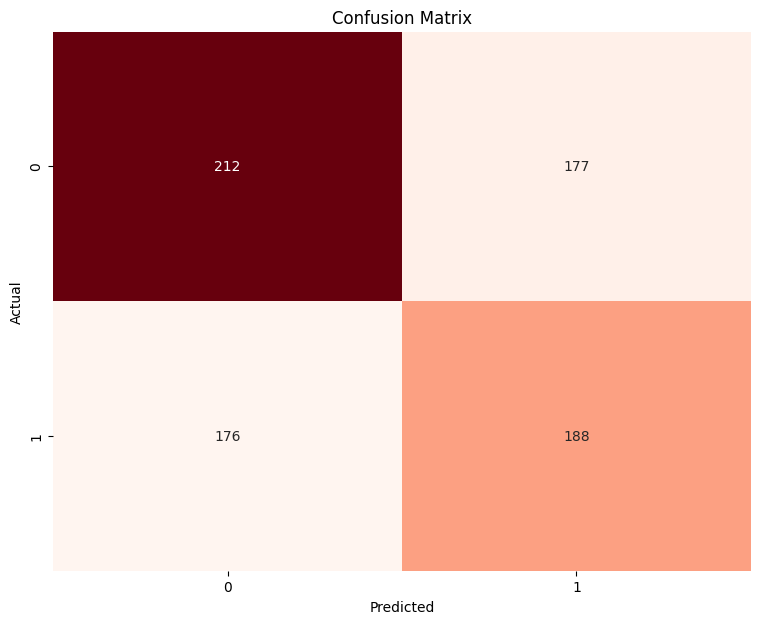

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Hypertuning the knn model using GridSereachCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [ 10, 30, 100, 500],   # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create the grid search object
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_test)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1-Score:', f1_score)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 100, 'weights': 'distance'}
Accuracy: 0.5710491367861886
Recall: 0.4835164835164835
Precision: 0.5704336727186882
F1-Score: 0.5678877821157319


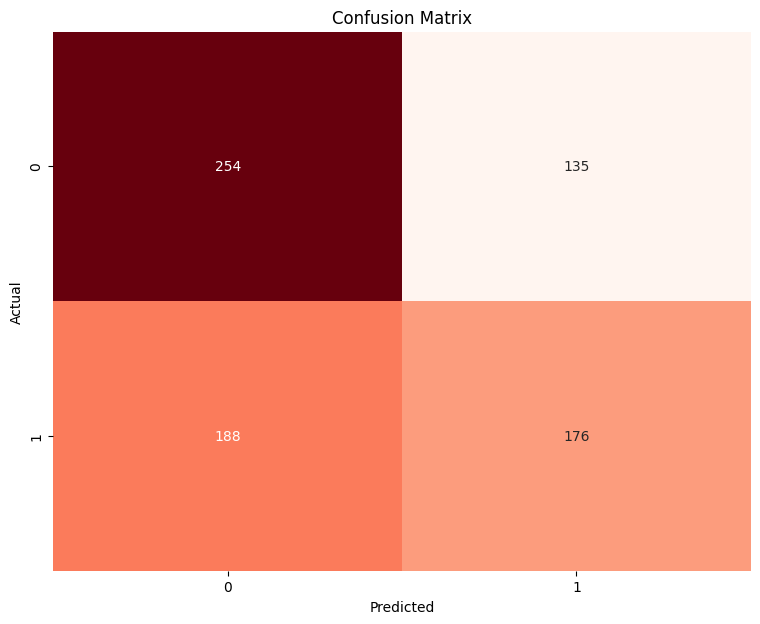

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Merging Rides dataset and weather dataset.
#Considering the impact of weather on user preference



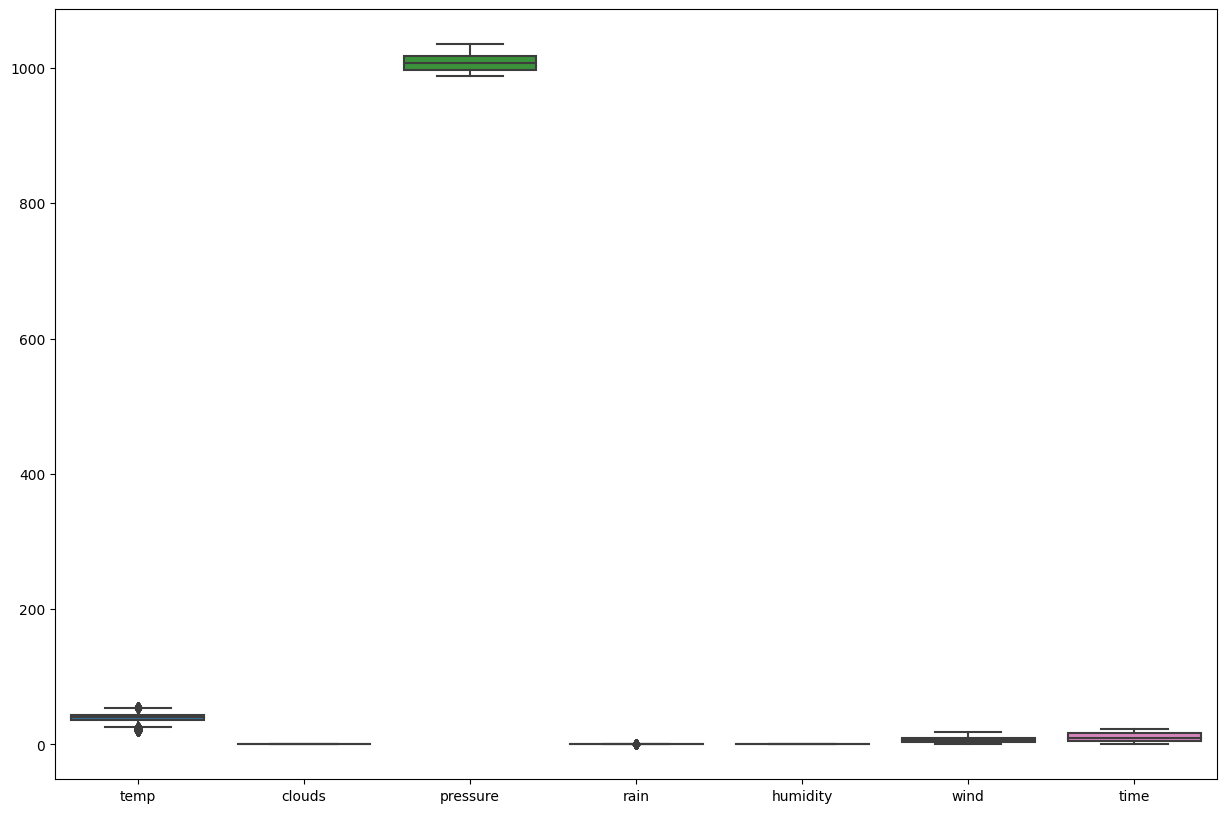

In [ ]:
columns = ["temp", "clouds", "pressure", "rain", "humidity", "wind", "time"]
plt.figure(figsize=(15, 10))
sns.boxplot(data=weather_data[columns])
plt.show()

#Data preprocessing and visualization

In [ ]:
weather_data.set_index(weather_data['time_stamp'],drop=False)

temp                 location  clouds  pressure    rain  \
time_stamp                                                                      
2018-12-16 23:45:01  42.42                 Back Bay    1.00   1012.14  0.1228   
2018-12-16 23:45:01  42.43              Beacon Hill    1.00   1012.15  0.1846   
2018-12-16 23:45:01  42.50        Boston University    1.00   1012.15  0.1089   
2018-12-16 23:45:01  42.11                   Fenway    1.00   1012.13  0.0969   
2018-12-16 23:45:01  43.13       Financial District    1.00   1012.14  0.1786   
...                    ...                      ...     ...       ...     ...   
2018-12-03 06:52:54  44.72            North Station    0.89   1000.69     NaN   
2018-12-03 06:52:54  44.85  Northeastern University    0.88   1000.71     NaN   
2018-12-03 06:52:54  44.82            South Station    0.89   1000.70     NaN   
2018-12-03 06:52:54  44.78         Theatre District    0.89   1000.70     NaN   
2018-12-03 06:52:54  44.69                 West End    0.89   1000.70     NaN   

                             time_stamp  humidity   wind        date  time  
time_stamp                                                                  
2018-12-16 23:45:01 2018-12-16 23:45:01      0.77  11.25  2018-12-16    23  
2018-12-16 23:45:01 2018-12-16 23:45:01      0.76  11.32  2018-12-16    23  
2018-12-16 23:45:01 2018-12-16 23:45:01      0.76  11.07  2018-12-16    23  
2018-12-16 23:45:01 2018-12-16 23:45:01      0.77  11.09  2018-12-16    23  
2018-12-16 23:45:01 2018-12-16 23:45:01      0.75  11.49  2018-12-16    23  
...                                 ...       ...    ...         ...   ...  
2018-12-03 06:52:54 2018-12-03 06:52:54      0.96   1.52  2018-12-03     6  
2018-12-03 06:52:54 2018-12-03 06:52:54      0.96   1.54  2018-12-03     6  
2018-12-03 06:52:54 2018-12-03 06:52:54      0.96   1.54  2018-12-03     6  
2018-12-03 06:52:54 2018-12-03 06:52:54      0.96   1.54  2018-12-03     6  
2018-12-03 06:52:54 2018-12-03 06:52:54      0.96   1.52  2018-12-03     6  

[6276 rows x 10 columns]

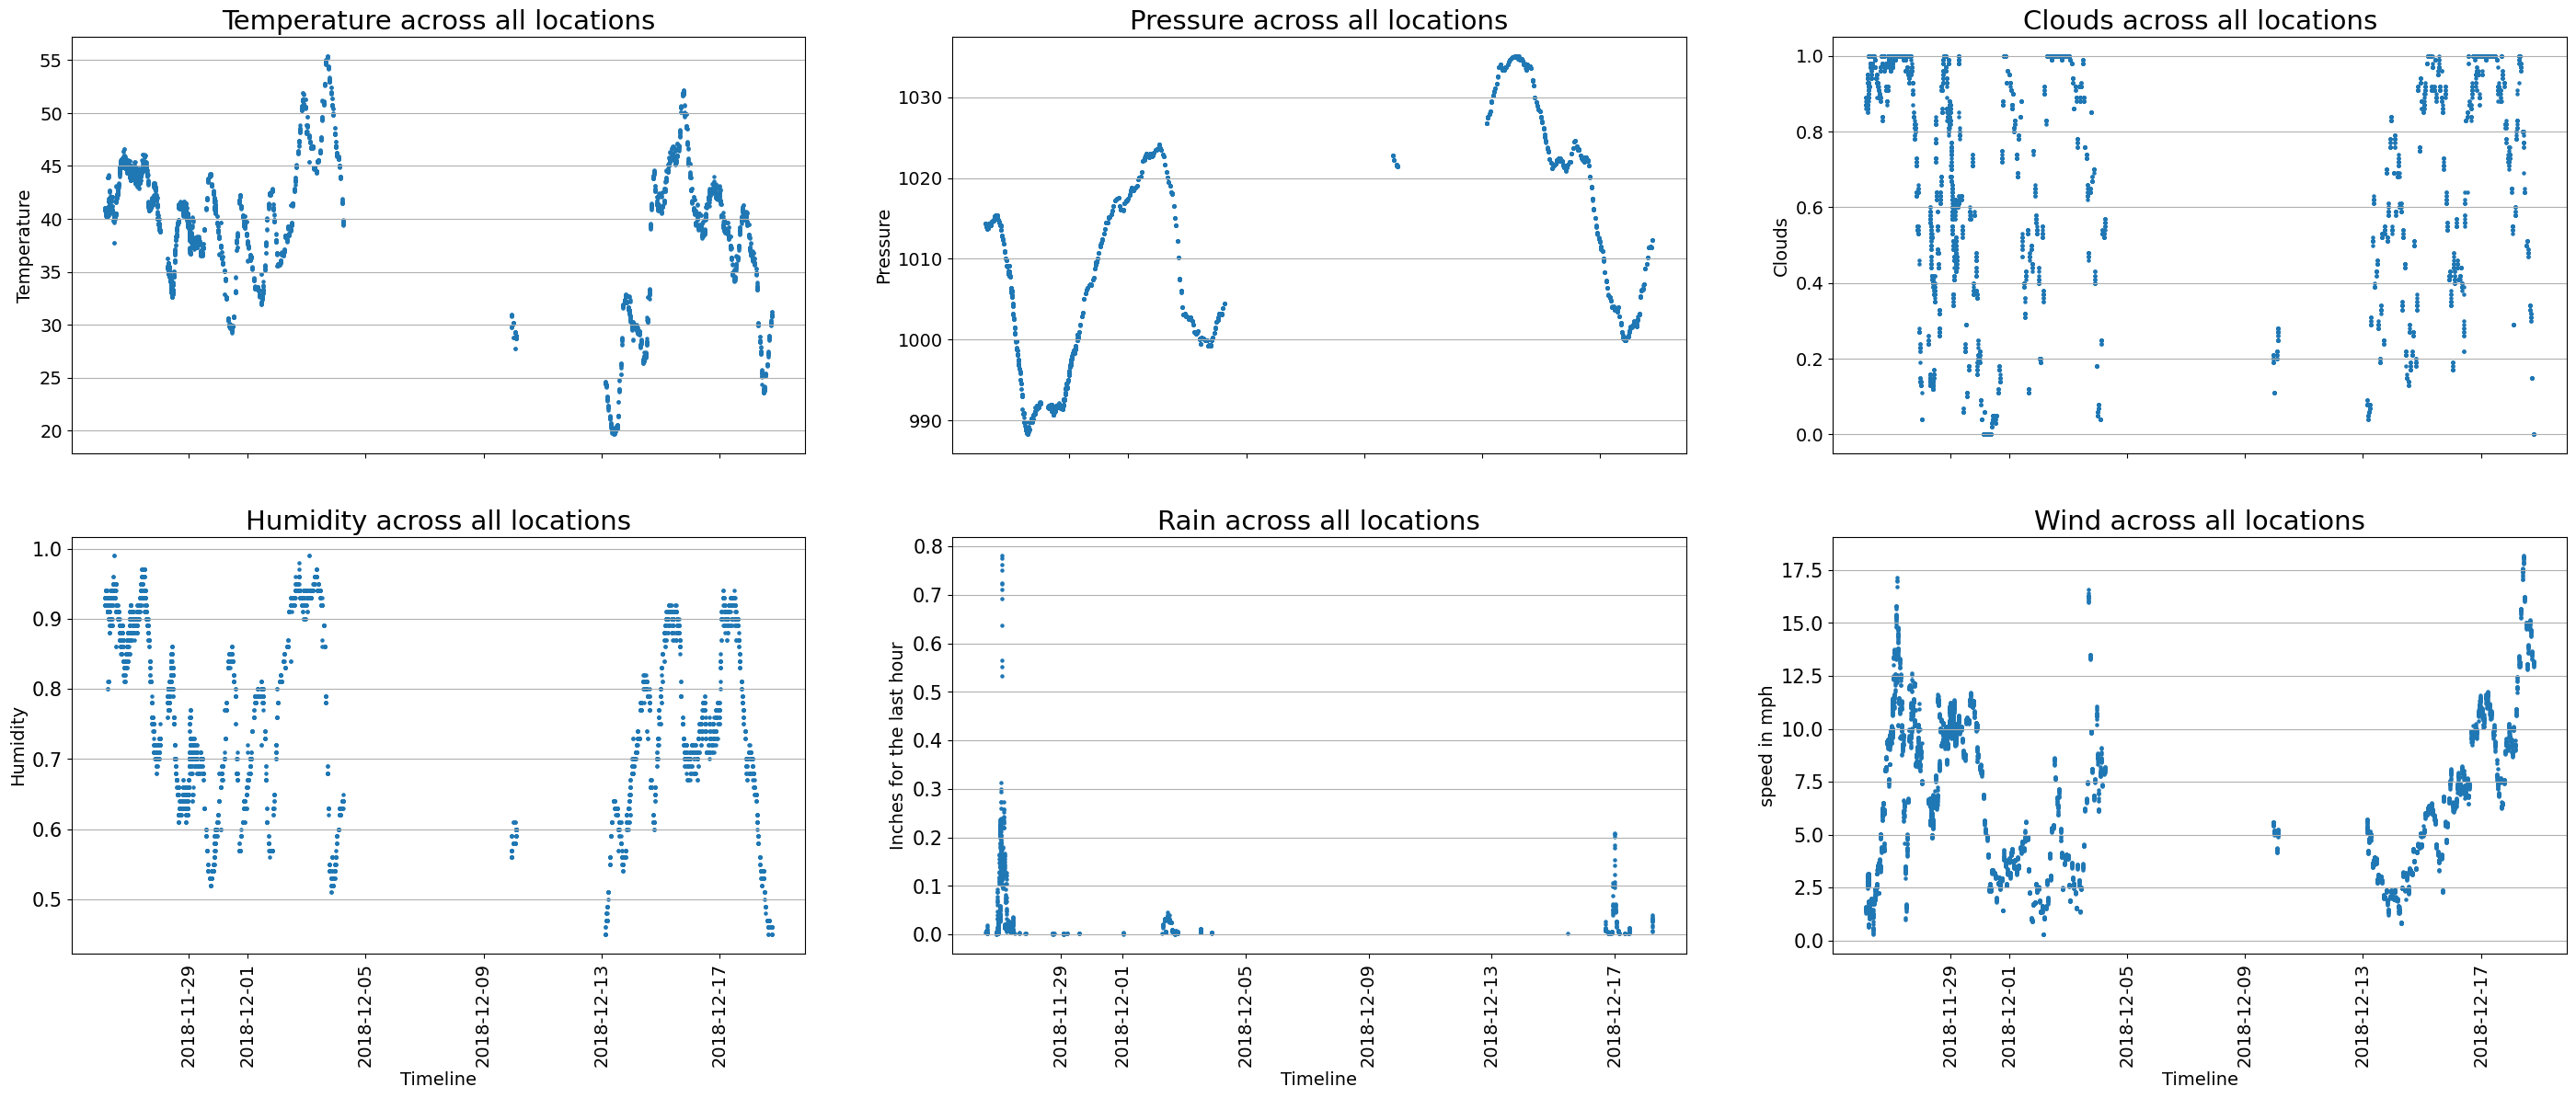

In [ ]:
plt.figure(figsize=((35,20)))
plt.grid(axis='y')

plt.subplot(3,3,1)
plt.scatter(weather_data['time_stamp'],weather_data['temp'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Temperature',fontsize=14)
plt.title('Temperature across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,2)
plt.scatter(weather_data['time_stamp'],weather_data['pressure'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Pressure',fontsize=14)
plt.title('Pressure across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,3)
plt.scatter(weather_data['time_stamp'],weather_data['clouds'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Clouds',fontsize=14)
plt.title('Clouds across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,4)
plt.scatter(weather_data['time_stamp'],weather_data['humidity'],s=5)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=14)
plt.ylabel('Humidity',fontsize=14)
plt.title('Humidity across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,5)
plt.scatter(weather_data['time_stamp'],weather_data['rain'],s=5)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=14)
plt.ylabel('Inches for the last hour',fontsize=14)
plt.title('Rain across all locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,6)
plt.scatter(weather_data['time_stamp'],weather_data['wind'],s=5)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=14)
plt.ylabel('speed in mph',fontsize=14)
plt.title('Wind across all locations',fontsize=21)
plt.grid(axis='y')

plt.show()

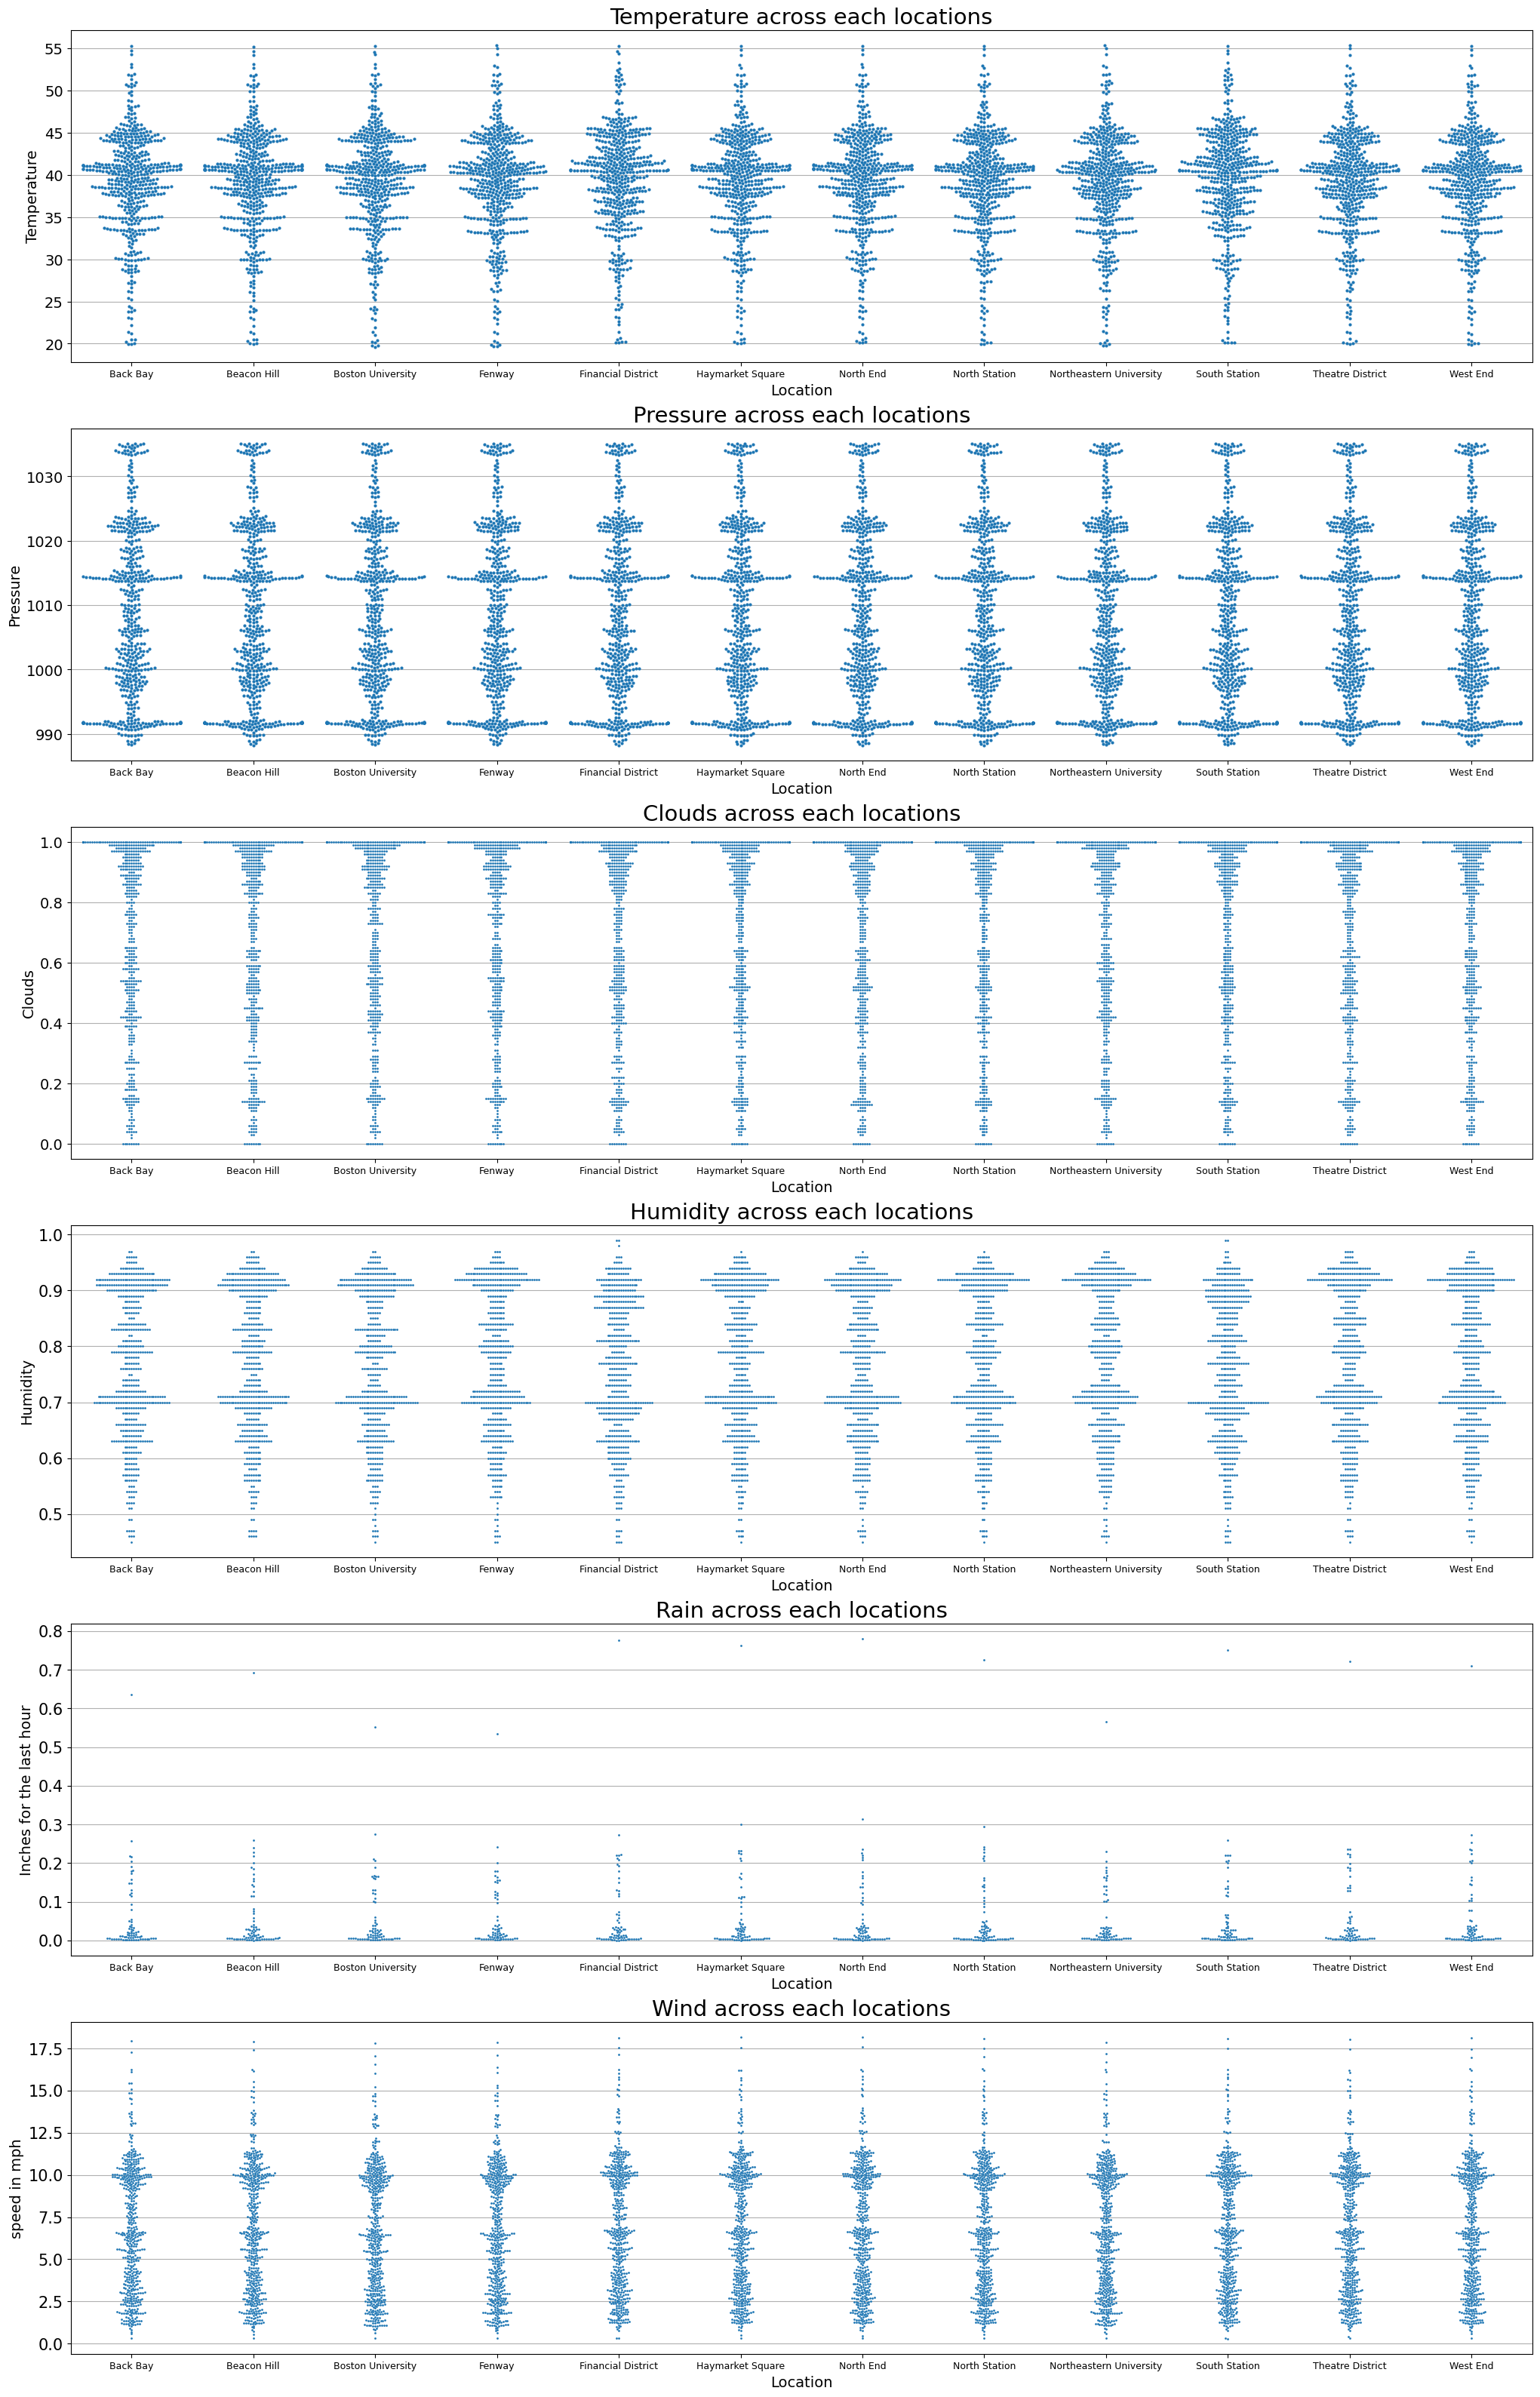

In [ ]:
plt.figure(figsize=((25,40)))
plt.grid(axis='y')

plt.subplot(6,1,1)
sns.swarmplot(x='location',y='temp',data=weather_data,size=3)
plt.xticks(fontsize=9)
plt.yticks(fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Temperature',fontsize=14)
plt.title('Temperature across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,2)
sns.swarmplot(x='location',y='pressure',data=weather_data,size=3)
plt.xticks(fontsize=9)
plt.yticks(fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Pressure',fontsize=14)
plt.title('Pressure across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,3)
sns.swarmplot(x='location',y='clouds',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Clouds',fontsize=14)
plt.title('Clouds across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,4)
sns.swarmplot(x='location',y='humidity',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=15)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Humidity',fontsize=14)
plt.title('Humidity across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,5)
sns.swarmplot(x='location',y='rain',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=15)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Inches for the last hour',fontsize=14)
plt.title('Rain across each locations',fontsize=21)
plt.grid(axis='y')

plt.subplot(6,1,6)
sns.swarmplot(x='location',y='wind',data=weather_data,size=2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=15)
plt.xlabel('Location', fontsize=14)
plt.ylabel('speed in mph',fontsize=14)
plt.title('Wind across each locations',fontsize=21)
plt.grid(axis='y')

plt.show()

#Merging the ride and weather dataset

In [ ]:
rides['date_location'] = rides['source'].astype(str)+', '+rides['date'].astype(str)+', '+rides['time'].astype(str)
weather_grouped = weather_data.groupby(['location','date','time']).mean()
weather_grouped = pd.DataFrame(weather_grouped).reset_index()
weather_grouped['date_location'] = weather_grouped['location'].astype(str)+', '+weather_grouped['date'].astype(str)+', '+weather_grouped['time'].astype(str)
weather_grouped.index = weather_grouped['date_location']
merged_ride = rides.join(weather_grouped,on=['date_location'],rsuffix='_weather')
merged_ride['rain'].fillna(0,inplace=True)
merged_ride

distance cab_type                    time_stamp  \
2          0.44     Lyft 2018-11-28 01:00:22.197999872   
11         1.08     Lyft 2018-11-28 19:23:07.778000128   
14         1.11     Uber 2018-12-13 19:15:03.935000064   
21         0.72     Lyft 2018-12-18 11:35:05.654000128   
28         2.48     Uber 2018-12-13 10:40:11.530999808   
...         ...      ...                           ...   
16370      3.61     Uber 2018-11-28 16:46:25.584999936   
16377      2.82     Lyft 2018-12-01 18:43:03.130000128   
16385      2.17     Uber 2018-12-01 07:37:56.496999936   
16396      0.49     Uber 2018-12-01 05:42:56.384999936   
16403      3.44     Uber 2018-12-13 09:35:05.309999872   

                   destination            source  price  surge_multiplier  \
2                North Station  Haymarket Square    7.0               1.0   
11     Northeastern University          Back Bay    7.0               1.0   
14                    West End         North End    7.5               1.0   
21            Haymarket Square     North Station    7.0               1.0   
28               South Station       Beacon Hill    8.5               1.0   
...                        ...               ...    ...               ...   
16370                 Back Bay         North End   12.0               1.0   
16377                 West End            Fenway   11.0               1.0   
16385            South Station     North Station    8.5               1.0   
16396            North Station  Haymarket Square    8.5               1.0   
16403                 Back Bay     South Station   10.5               1.0   

                                         id  \
2      981a3613-77af-4620-a42a-0c0866077d1e   
11     d859ec69-b3ff-4af8-9abd-441e31430c94   
14     357559cb-8c58-4278-a41a-e33b2e0997a3   
21     5ef44fdf-c5d3-4d07-967a-a8710e537e74   
28     4149295f-4534-4712-b2cf-160308528c75   
...                                     ...   
16370  1e2e9653-b89f-41f4-bdf1-d10d3334a6fa   
16377  359c6462-2e14-4fca-97b7-833871e4d1ef   
16385  a02b5352-ea01-4e1c-aec1-6439b37b7ce7   
16396  c9387458-2c06-454f-8bea-1b7301245013   
16403  c8976f5a-2fae-47b0-aca6-2c6d1e29a9d5   

                                 product_id   name  ...          location  \
2                                      lyft   Lyft  ...               NaN   
11                                     lyft   Lyft  ...          Back Bay   
14     55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...         North End   
21                                     lyft   Lyft  ...     North Station   
28     55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...       Beacon Hill   
...                                     ...    ...  ...               ...   
16370  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...         North End   
16377                                  lyft   Lyft  ...            Fenway   
16385  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...     North Station   
16396  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...  Haymarket Square   
16403  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...     South Station   

       date_weather  time_weather       temp clouds     pressure  rain  \
2               NaN           NaN        NaN    NaN          NaN   0.0   
11       2018-11-28          19.0  40.883333   1.00   992.113333   0.0   
14       2018-12-13          19.0  32.750000   0.51  1033.750000   0.0   
21       2018-12-18          11.0  23.650000   0.64  1006.820000   0.0   
28       2018-12-13          10.0  20.030000   0.43  1031.070000   0.0   
...             ...           ...        ...    ...          ...   ...   
16370    2018-11-28          16.0  41.190000   0.65   991.570000   0.0   
16377    2018-12-01          18.0  42.460000   0.44  1022.640000   0.0   
16385    2018-12-01           7.0  33.530000   0.78  1019.860000   0.0   
16396    2018-12-01           5.0  33.610000   0.74  1018.840000   0.0   
16403    2018-12-13           9.0  20.150000   0.39  1030.700000   0.0   

      

In [ ]:
merged_ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 2 to 16403
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   distance               2509 non-null   float64       
 1   cab_type               2509 non-null   object        
 2   time_stamp             2509 non-null   datetime64[ns]
 3   destination            2509 non-null   object        
 4   source                 2509 non-null   object        
 5   price                  2509 non-null   float64       
 6   surge_multiplier       2509 non-null   float64       
 7   id                     2509 non-null   object        
 8   product_id             2509 non-null   object        
 9   name                   2509 non-null   object        
 10  date                   2509 non-null   object        
 11  time                   2509 non-null   int64         
 12  week_day               2509 non-null   int64         
 13  da

In [ ]:
merged_ride = merged_ride.dropna()
pd.DataFrame(merged_ride).reset_index(drop = True, inplace=True)
merged_ride

distance cab_type                    time_stamp  \
0         1.08     Lyft 2018-11-28 19:23:07.778000128   
1         1.11     Uber 2018-12-13 19:15:03.935000064   
2         0.72     Lyft 2018-12-18 11:35:05.654000128   
3         2.48     Uber 2018-12-13 10:40:11.530999808   
4         3.24     Lyft 2018-12-02 18:23:07.499000064   
...        ...      ...                           ...   
2489      3.61     Uber 2018-11-28 16:46:25.584999936   
2490      2.82     Lyft 2018-12-01 18:43:03.130000128   
2491      2.17     Uber 2018-12-01 07:37:56.496999936   
2492      0.49     Uber 2018-12-01 05:42:56.384999936   
2493      3.44     Uber 2018-12-13 09:35:05.309999872   

                  destination            source  price  surge_multiplier  \
0     Northeastern University          Back Bay    7.0               1.0   
1                    West End         North End    7.5               1.0   
2            Haymarket Square     North Station    7.0               1.0   
3               South Station       Beacon Hill    8.5               1.0   
4     Northeastern University     North Station   11.0               1.0   
...                       ...               ...    ...               ...   
2489                 Back Bay         North End   12.0               1.0   
2490                 West End            Fenway   11.0               1.0   
2491            South Station     North Station    8.5               1.0   
2492            North Station  Haymarket Square    8.5               1.0   
2493                 Back Bay     South Station   10.5               1.0   

                                        id  \
0     d859ec69-b3ff-4af8-9abd-441e31430c94   
1     357559cb-8c58-4278-a41a-e33b2e0997a3   
2     5ef44fdf-c5d3-4d07-967a-a8710e537e74   
3     4149295f-4534-4712-b2cf-160308528c75   
4     174b960d-58f1-4dfd-8672-8b43f13726a7   
...                                    ...   
2489  1e2e9653-b89f-41f4-bdf1-d10d3334a6fa   
2490  359c6462-2e14-4fca-97b7-833871e4d1ef   
2491  a02b5352-ea01-4e1c-aec1-6439b37b7ce7   
2492  c9387458-2c06-454f-8bea-1b7301245013   
2493  c8976f5a-2fae-47b0-aca6-2c6d1e29a9d5   

                                product_id   name  ...          location  \
0                                     lyft   Lyft  ...          Back Bay   
1     55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...         North End   
2                                     lyft   Lyft  ...     North Station   
3     55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...       Beacon Hill   
4                                     lyft   Lyft  ...     North Station   
...                                    ...    ...  ...               ...   
2489  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...         North End   
2490                                  lyft   Lyft  ...            Fenway   
2491  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...     North Station   
2492  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...  Haymarket Square   
2493  55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX  ...     South Station   

      date_weather  time_weather       temp clouds     pressure   rain  \
0       2018-11-28          19.0  40.883333   1.00   992.113333  0.000   
1       2018-12-13          19.0  32.750000   0.51  1033.750000  0.000   
2       2018-12-18          11.0  23.650000   0.64  1006.820000  0.000   
3       2018-12-13          10.0  20.030000   0.43  1031.070000  0.000   
4       2018-12-02          18.0  48.340000   0.99  1006.020000  0.003   
...            ...           ...        ...    ...          ...    ...   
2489    2018-11-28          16.0  41.190000   0.65   991.570000  0.000   
2490    2018-12-01          18.0  42.460000   0.44  1022.640000  0.000   
2491    2018-12-01           7.0  33.530000   0.78  1019.860000  0.000   
2492    2018-12-01           5.0  33.610000   0.74  1018.840000  0.000   
2493    2018-12-13           9.0  20.150000   0.39  1030.700000  0.000   

      humidity   wind            date_location_weathe

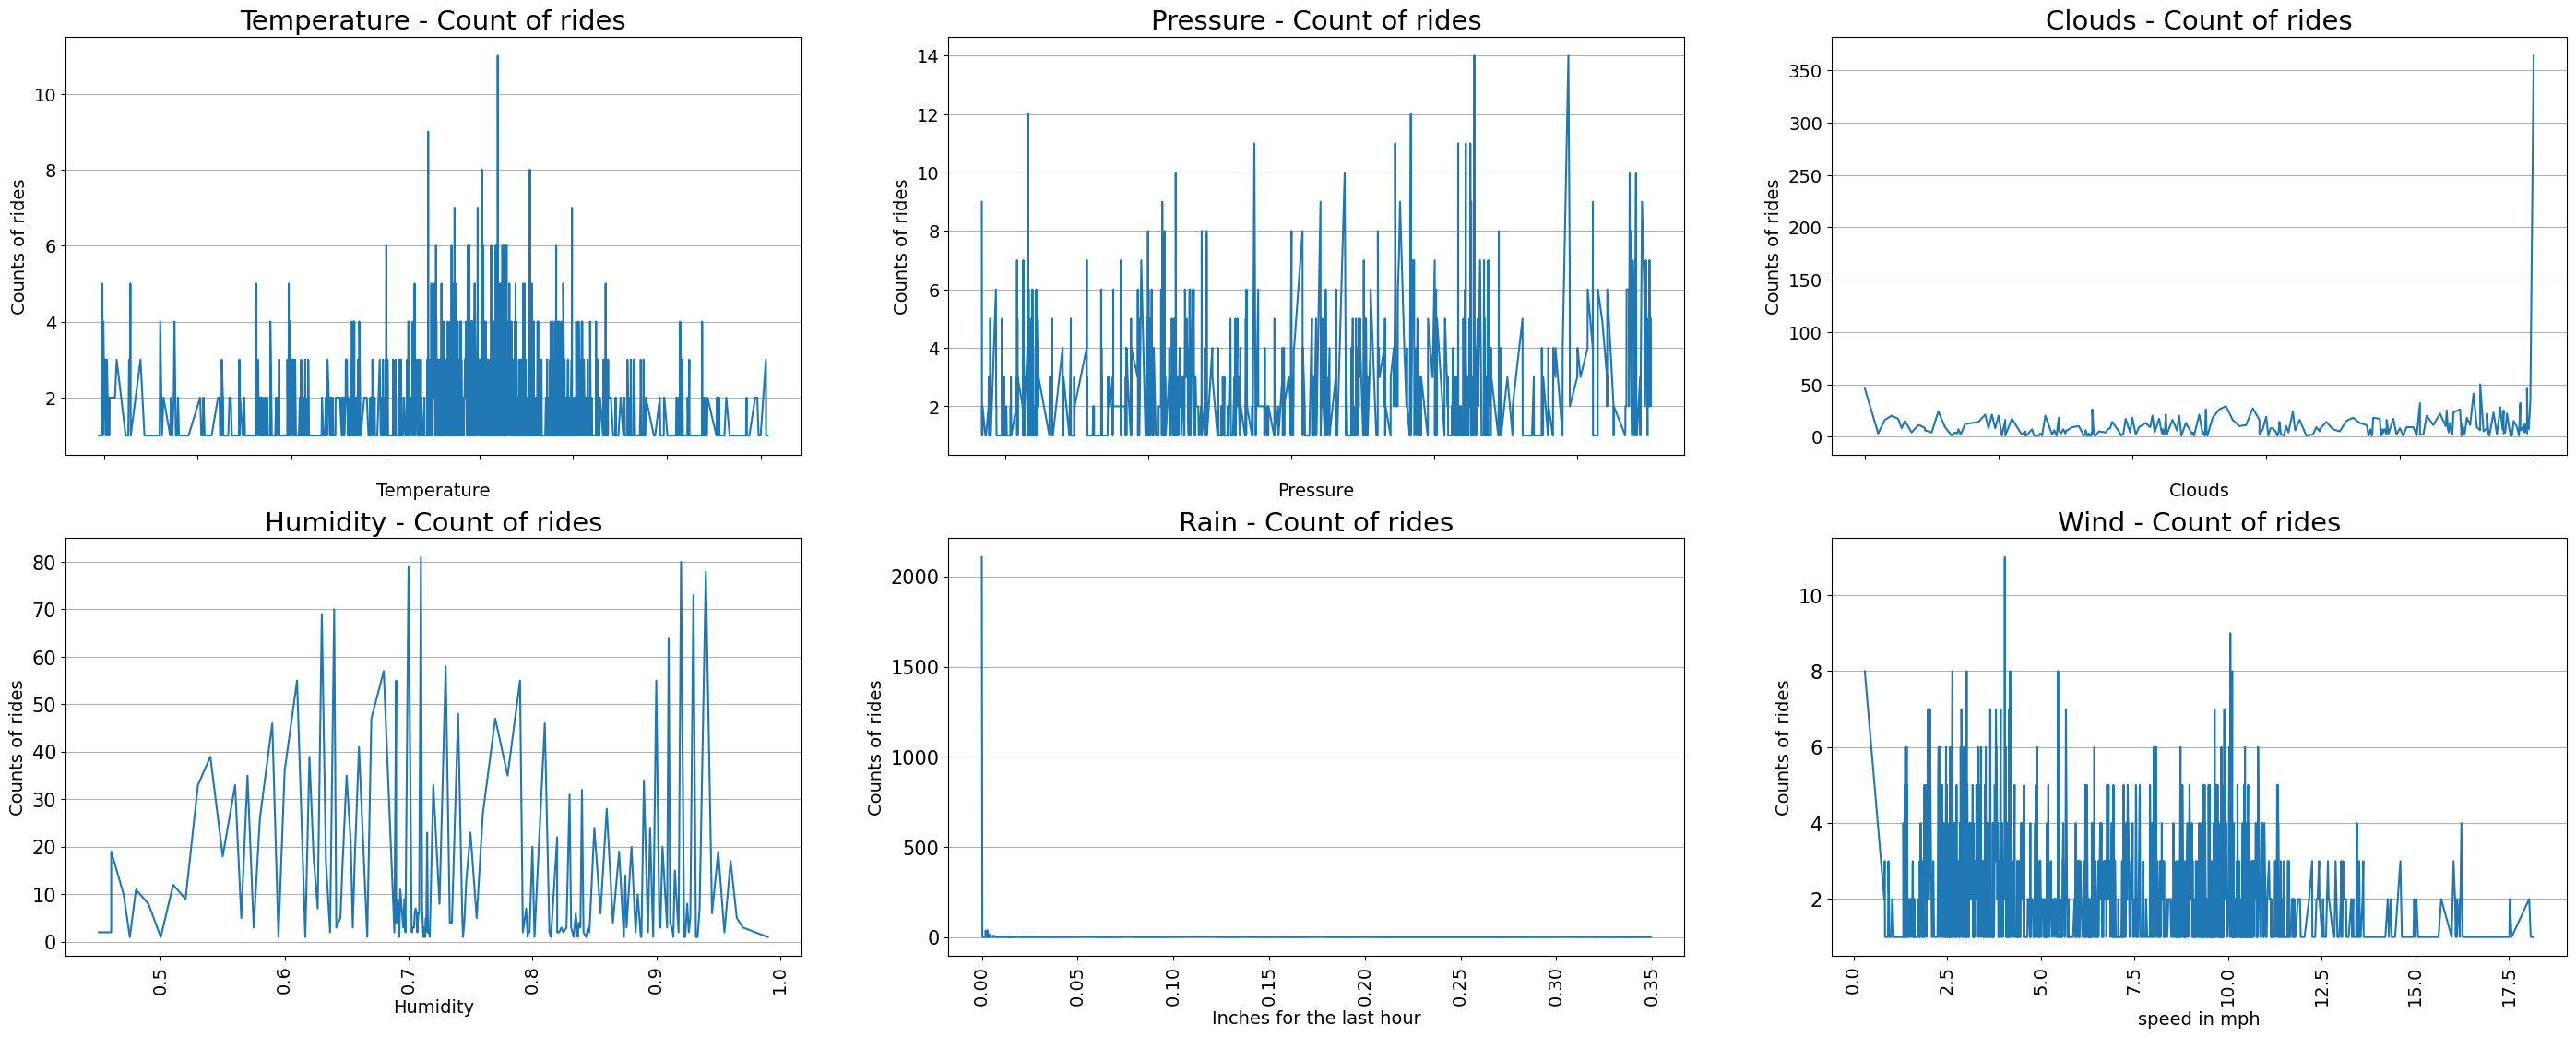

In [ ]:
plt.figure(figsize=((35,20)))
plt.grid(axis='y')

plt.subplot(3,3,1)
merged_ride.groupby('temp')['id'].count().plot()
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Temperature - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,2)
merged_ride.groupby('pressure')['id'].count().plot()
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('Pressure',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Pressure - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,3)
merged_ride.groupby('clouds')['id'].count().plot()
plt.xticks(color='white')
plt.yticks(fontsize=14)
plt.xlabel('Clouds',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Clouds - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,4)
merged_ride.groupby('humidity')['id'].count().plot()
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Humidity',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Humidity - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,5)
merged_ride.groupby('rain')['id'].count().plot()
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Inches for the last hour',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Rain - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.subplot(3,3,6)
merged_ride.groupby('wind')['id'].count().plot()
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('speed in mph',fontsize=14)
plt.ylabel('Counts of rides',fontsize=14)
plt.title('Wind - Count of rides',fontsize=21)
plt.grid(axis='y')

plt.show()

#Finding correlation between features within the merged dataset

In [ ]:
merged_ried_corr = merged_ride

In [ ]:
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
merged_ride_corr['destination'] = merged_ride_corr['destination'].map(destination_mapping)
merged_ride_corr['source'] = merged_ride_corr['source'].map(source_mapping)
#merged_ride_corr['date'] = merged_ride_corr['date'].astype(str)
merged_ride_corr

In [ ]:
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')

#Splitting the dataset and training the model uing SVM

In [ ]:
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date_location', 'date', 'location', 'date_weather', 'time_weather', 'date_location_weather']

In [ ]:
X = merged_ride.drop(columns_to_drop, axis=1)
y = merged_ride['cab_type']
X

distance              destination            source  price  \
0         1.08  Northeastern University          Back Bay    7.0   
1         1.11                 West End         North End    7.5   
2         0.72         Haymarket Square     North Station    7.0   
3         2.48            South Station       Beacon Hill    8.5   
4         3.24  Northeastern University     North Station   11.0   
...        ...                      ...               ...    ...   
2489      3.61                 Back Bay         North End   12.0   
2490      2.82                 West End            Fenway   11.0   
2491      2.17            South Station     North Station    8.5   
2492      0.49            North Station  Haymarket Square    8.5   
2493      3.44                 Back Bay     South Station   10.5   

      surge_multiplier  time  week_day       temp  clouds     pressure   rain  \
0                  1.0    19         2  40.883333    1.00   992.113333  0.000   
1                  1.0    19         3  32.750000    0.51  1033.750000  0.000   
2                  1.0    11         1  23.650000    0.64  1006.820000  0.000   
3                  1.0    10         3  20.030000    0.43  1031.070000  0.000   
4                  1.0    18         6  48.340000    0.99  1006.020000  0.003   
...                ...   ...       ...        ...     ...          ...    ...   
2489               1.0    16         2  41.190000    0.65   991.570000  0.000   
2490               1.0    18         5  42.460000    0.44  1022.640000  0.000   
2491               1.0     7         5  33.530000    0.78  1019.860000  0.000   
2492               1.0     5         5  33.610000    0.74  1018.840000  0.000   
2493               1.0     9         3  20.150000    0.39  1030.700000  0.000   

      humidity   wind  
0     0.646667   9.61  
1     0.570000   1.90  
2     0.540000  16.19  
3     0.630000   3.80  
4     0.940000   4.11  
...        ...    ...  
2489  0.623333  10.07  
2490  0.570000   0.90  
2491  0.790000   3.53  
2492  0.780000   3.29  
2493  0.640000   3.93  

[2494 rows x 13 columns]

In [ ]:
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
#X['date'] = X['date'].astype(str)
X

distance  destination  source  price  surge_multiplier  time  week_day  \
0         1.08            8       0    7.0               1.0    19         2   
1         1.11           11       6    7.5               1.0    19         3   
2         0.72            5       7    7.0               1.0    11         1   
3         2.48            9       1    8.5               1.0    10         3   
4         3.24            8       7   11.0               1.0    18         6   
...        ...          ...     ...    ...               ...   ...       ...   
2489      3.61            0       6   12.0               1.0    16         2   
2490      2.82           11       3   11.0               1.0    18         5   
2491      2.17            9       7    8.5               1.0     7         5   
2492      0.49            7       5    8.5               1.0     5         5   
2493      3.44            0       9   10.5               1.0     9         3   

           temp  clouds     pressure   rain  humidity   wind  
0     40.883333    1.00   992.113333  0.000  0.646667   9.61  
1     32.750000    0.51  1033.750000  0.000  0.570000   1.90  
2     23.650000    0.64  1006.820000  0.000  0.540000  16.19  
3     20.030000    0.43  1031.070000  0.000  0.630000   3.80  
4     48.340000    0.99  1006.020000  0.003  0.940000   4.11  
...         ...     ...          ...    ...       ...    ...  
2489  41.190000    0.65   991.570000  0.000  0.623333  10.07  
2490  42.460000    0.44  1022.640000  0.000  0.570000   0.90  
2491  33.530000    0.78  1019.860000  0.000  0.790000   3.53  
2492  33.610000    0.74  1018.840000  0.000  0.780000   3.29  
2493  20.150000    0.39  1030.700000  0.000  0.640000   3.93  

[2494 rows x 13 columns]

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

0       1
1       0
2       1
3       0
4       1
       ..
2489    0
2490    1
2491    0
2492    0
2493    0
Name: cab_type, Length: 2494, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc_clf.predict(X_test)

#Evaluating the performance of model using various performace metrics

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Precision= precision_score(y_test, y_pred, average='weighted')
F1_Score= f1_score(y_test, y_pred, average='weighted')
Recall= recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Recall :', Recall)
print('Precision :', Precision)
print('F1-SCore :', F1_Score)

Accuracy: 0.5180240320427236
Recall : 0.0
Precision : 0.2683488977738008
F1-SCore : 0.35355026285413677


#Visualizing the performance using confusion matrix

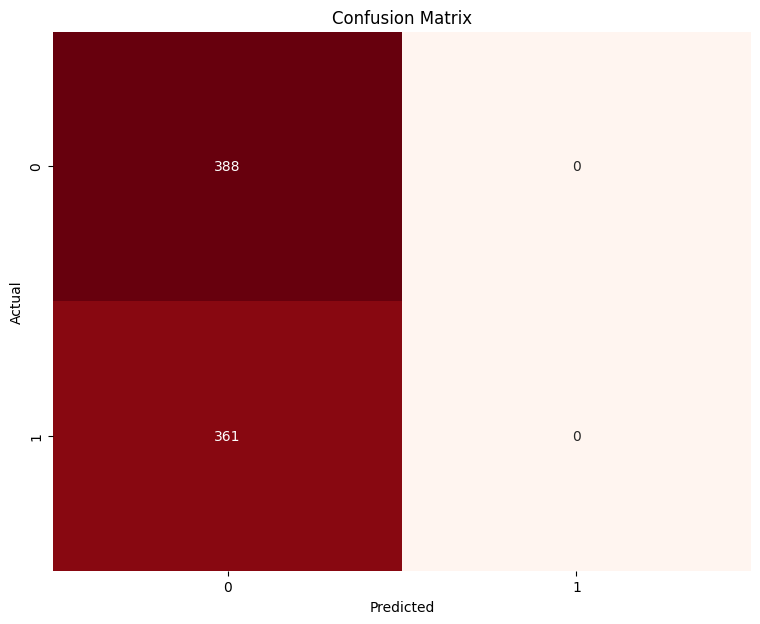

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Splitting the dataset and training the model uing logistic regression

In [ ]:
X

distance  destination  source  price  surge_multiplier  time  week_day  \
0         1.08            8       0    7.0               1.0    19         2   
1         1.11           11       6    7.5               1.0    19         3   
2         0.72            5       7    7.0               1.0    11         1   
3         2.48            9       1    8.5               1.0    10         3   
4         3.24            8       7   11.0               1.0    18         6   
...        ...          ...     ...    ...               ...   ...       ...   
2489      3.61            0       6   12.0               1.0    16         2   
2490      2.82           11       3   11.0               1.0    18         5   
2491      2.17            9       7    8.5               1.0     7         5   
2492      0.49            7       5    8.5               1.0     5         5   
2493      3.44            0       9   10.5               1.0     9         3   

           temp  clouds     pressure   rain  humidity   wind  
0     40.883333    1.00   992.113333  0.000  0.646667   9.61  
1     32.750000    0.51  1033.750000  0.000  0.570000   1.90  
2     23.650000    0.64  1006.820000  0.000  0.540000  16.19  
3     20.030000    0.43  1031.070000  0.000  0.630000   3.80  
4     48.340000    0.99  1006.020000  0.003  0.940000   4.11  
...         ...     ...          ...    ...       ...    ...  
2489  41.190000    0.65   991.570000  0.000  0.623333  10.07  
2490  42.460000    0.44  1022.640000  0.000  0.570000   0.90  
2491  33.530000    0.78  1019.860000  0.000  0.790000   3.53  
2492  33.610000    0.74  1018.840000  0.000  0.780000   3.29  
2493  20.150000    0.39  1030.700000  0.000  0.640000   3.93  

[2494 rows x 13 columns]

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 8],  # Regularization parameter
    'kernel': ['linear', 'rbf'],
   'gamma': ['scale', 'auto', 0.1, 1],
   'shrinking': [True, False],
}

# Create SVC classifier
svc_clf = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svc_clf, param_grid, scoring='accuracy', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the SVC classifier with the best parameters
best_svc_clf = SVC(**best_params)
best_svc_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svc_clf.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1-Score:', f1_score)
'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)\n\n# Define the parameter grid\nparam_grid = {\n    \'C\': [0.1, 1, 8],  # Regularization parameter\n    \'kernel\': [\'linear\', \'rbf\'],\n   \'gamma\': [\'scale\', \'auto\', 0.1, 1],\n   \'shrinking\': [True, False],\n}\n\n# Create SVC classifier\nsvc_clf = SVC()\n\n# Create GridSearchCV object\ngrid_search = GridSearchCV(svc_clf, param_grid, scoring=\'accuracy\', cv=5)\n\n# Fit the model to the training data\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters from the grid search\nbest_params = grid_search.best_params_\n\n# Train the SVC classifier with the best parameters\nbest_svc_clf = SVC(**best_params)\nbest_svc_clf.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred = best_svc_clf.predict(X_test)\n\n# Calculate evaluation metrics\nprecision = precision_score(y_test, y

In [ ]:
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date_location', 'date', 'location', 'date_weather', 'time_weather', 'date_location_weather']

In [ ]:
X = merged_ride.drop(columns_to_drop, axis=1)
y = merged_ride['cab_type']

In [ ]:
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
#X['date'] = X['date'].astype(str)
X

distance  destination  source  price  surge_multiplier  time  week_day  \
0         1.08            8       0    7.0               1.0    19         2   
1         1.11           11       6    7.5               1.0    19         3   
2         0.72            5       7    7.0               1.0    11         1   
3         2.48            9       1    8.5               1.0    10         3   
4         3.24            8       7   11.0               1.0    18         6   
...        ...          ...     ...    ...               ...   ...       ...   
2489      3.61            0       6   12.0               1.0    16         2   
2490      2.82           11       3   11.0               1.0    18         5   
2491      2.17            9       7    8.5               1.0     7         5   
2492      0.49            7       5    8.5               1.0     5         5   
2493      3.44            0       9   10.5               1.0     9         3   

           temp  clouds     pressure   rain  humidity   wind  
0     40.883333    1.00   992.113333  0.000  0.646667   9.61  
1     32.750000    0.51  1033.750000  0.000  0.570000   1.90  
2     23.650000    0.64  1006.820000  0.000  0.540000  16.19  
3     20.030000    0.43  1031.070000  0.000  0.630000   3.80  
4     48.340000    0.99  1006.020000  0.003  0.940000   4.11  
...         ...     ...          ...    ...       ...    ...  
2489  41.190000    0.65   991.570000  0.000  0.623333  10.07  
2490  42.460000    0.44  1022.640000  0.000  0.570000   0.90  
2491  33.530000    0.78  1019.860000  0.000  0.790000   3.53  
2492  33.610000    0.74  1018.840000  0.000  0.780000   3.29  
2493  20.150000    0.39  1030.700000  0.000  0.640000   3.93  

[2494 rows x 13 columns]

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

0       1
1       0
2       1
3       0
4       1
       ..
2489    0
2490    1
2491    0
2492    0
2493    0
Name: cab_type, Length: 2494, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

##Evaluting the performace of model using various performance metrics

In [ ]:
y_pred =logistic_regression.predict(X_test)
f1score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("f1_score", f1score)
print("precision", precision)
print("recall", recall)

f1_score 0.46153846153846156
precision 0.5822784810126582
recall 0.38227146814404434


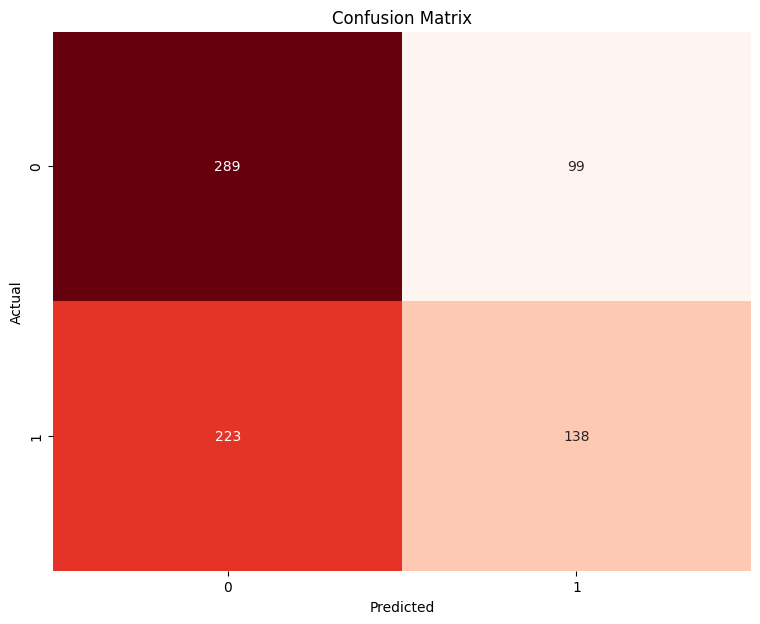

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Splitting the dataset and training the model uing KNN

In [ ]:
columns_to_drop = ['id', 'product_id', 'time_stamp', 'cab_type', 'name', 'date_location', 'date', 'location', 'date_weather', 'time_weather', 'date_location_weather']

In [ ]:
X = merged_ride.drop(columns_to_drop, axis=1)
y = merged_ride['cab_type']

In [ ]:
destination_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                        'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                        'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                        'Theatre District': 10, 'West End': 11}

source_mapping = {'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3,
                   'Financial District': 4, 'Haymarket Square': 5, 'North End': 6,
                   'North Station': 7, 'Northeastern University': 8, 'South Station': 9,
                   'Theatre District': 10, 'West End': 11}

# Map the values using the map function
X['destination'] = X['destination'].map(destination_mapping)
X['source'] = X['source'].map(source_mapping)
#X['date'] = X['date'].astype(str)
X

distance  destination  source  price  surge_multiplier  time  week_day  \
0         1.08            8       0    7.0               1.0    19         2   
1         1.11           11       6    7.5               1.0    19         3   
2         0.72            5       7    7.0               1.0    11         1   
3         2.48            9       1    8.5               1.0    10         3   
4         3.24            8       7   11.0               1.0    18         6   
...        ...          ...     ...    ...               ...   ...       ...   
2489      3.61            0       6   12.0               1.0    16         2   
2490      2.82           11       3   11.0               1.0    18         5   
2491      2.17            9       7    8.5               1.0     7         5   
2492      0.49            7       5    8.5               1.0     5         5   
2493      3.44            0       9   10.5               1.0     9         3   

           temp  clouds     pressure   rain  humidity   wind  
0     40.883333    1.00   992.113333  0.000  0.646667   9.61  
1     32.750000    0.51  1033.750000  0.000  0.570000   1.90  
2     23.650000    0.64  1006.820000  0.000  0.540000  16.19  
3     20.030000    0.43  1031.070000  0.000  0.630000   3.80  
4     48.340000    0.99  1006.020000  0.003  0.940000   4.11  
...         ...     ...          ...    ...       ...    ...  
2489  41.190000    0.65   991.570000  0.000  0.623333  10.07  
2490  42.460000    0.44  1022.640000  0.000  0.570000   0.90  
2491  33.530000    0.78  1019.860000  0.000  0.790000   3.53  
2492  33.610000    0.74  1018.840000  0.000  0.780000   3.29  
2493  20.150000    0.39  1030.700000  0.000  0.640000   3.93  

[2494 rows x 13 columns]

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y

0       1
1       0
2       1
3       0
4       1
       ..
2489    0
2490    1
2491    0
2492    0
2493    0
Name: cab_type, Length: 2494, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
knn_classifier = KNeighborsClassifier()

In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test)

##Evaluating the performance of the model using various metrics

In [ ]:
Precision= precision_score(y_test, y_pred, average='weighted')
F1_Score= f1_score(y_test, y_pred, average='weighted')
Recall= recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Recall :', Recall)
print('Precision :', Precision)
print('F1-SCore :', F1_Score)

Accuracy: 0.5153538050734312
Recall : 0.44321329639889195
Precision : 0.5136678181640959
F1-SCore : 0.5131127370574767


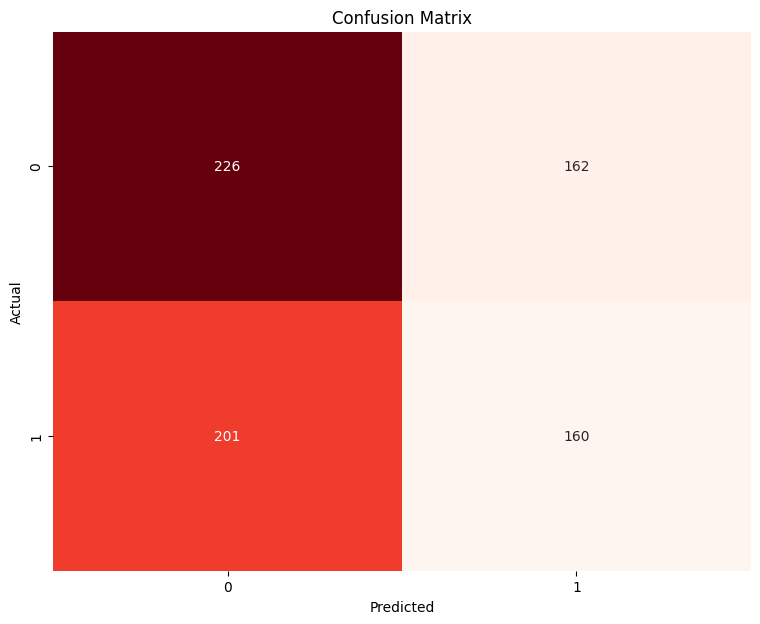

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Hyperparameter tuning the KNN model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are defined

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 9, 147, 148, 149, 150],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create KNN classifier
knn_classifier = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1-Score:', f1)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 149, 'weights': 'distance'}
Accuracy: 0.5874499332443258
Recall: 0.3545706371191136
Precision: 0.5989731706795726
F1-Score: 0.5648418342802117


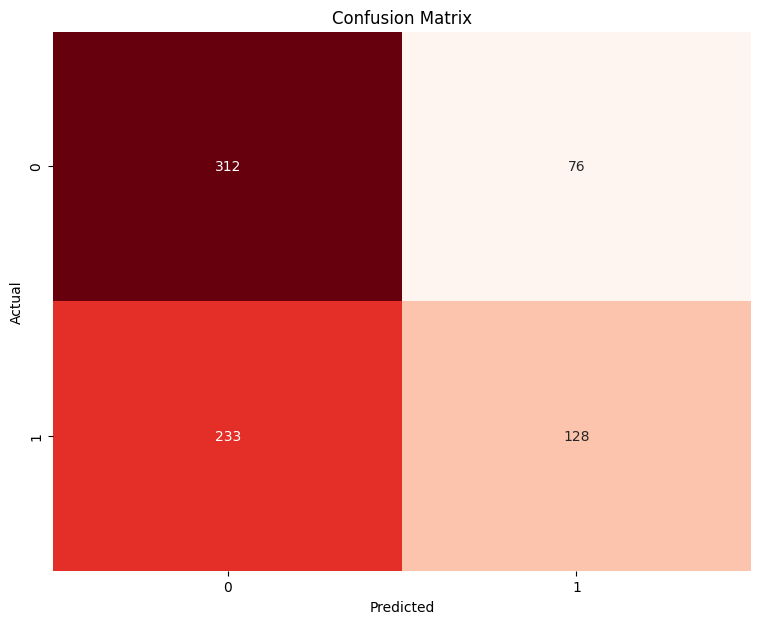

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()